# Pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Data: Number of registered passenger cars in 2016

df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/panel_data.csv')
df.head()

,month,brand,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
0,1,ALFA ROMEO,0,0,0,0,1,0,1
1,1,AUDI,0,2,0,14,0,0,16
2,1,BENTLEY,0,0,0,0,2,0,2
3,1,BMW,1,45,0,586,64,0,696
4,1,CADILLAC,0,0,0,0,1,0,1


In [ ]:
df[df['brand'].str.lower().str.contains('audi|bmw|benz')]
# df[df['brand'].str.contains('(?i)audi|bmw|benz')] # Regex ignore case

,month,brand,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
1,1,AUDI,0,2,0,14,0,0,16
3,1,BMW,1,45,0,586,64,0,696
20,1,MERCEDES BENZ,0,161,46,372,605,0,1184
38,2,AUDI,0,0,0,10,0,0,10
39,2,BMW,0,60,0,689,52,0,801
55,2,MERCEDES BENZ,0,193,42,475,672,0,1382
77,3,AUDI,0,0,0,15,1,0,16
79,3,BMW,0,55,0,658,55,0,768
92,3,MERCEDES BENZ,0,174,41,554,650,0,1419
110,4,AUDI,0,0,0,7,0,0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     430 non-null    int64 
 1   brand     430 non-null    object
 2   1300cc    430 non-null    int64 
 3   1600cc    430 non-null    int64 
 4   1800cc    430 non-null    int64 
 5   2000cc    430 non-null    int64 
 6   gt2000cc  430 non-null    int64 
 7   elec      430 non-null    int64 
 8   total     430 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 30.4+ KB


In [ ]:
df.drop(['month'], axis=1).sum(numeric_only=True)

1300cc      106020
1600cc      133028
1800cc       42628
2000cc       85363
gt2000cc    168878
elec             2
total       535919
dtype: int64

In [ ]:
df.drop(['month'], axis=1).groupby('brand').sum().nlargest(5, 'total')
# df.drop(['month'], axis=1).groupby('brand').sum().nsmallest(5, 'total')

,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
brand,,,,,,,
TOYOTA,37713,36105,7715,4359,72058,0,157950
HONDA,1890,69590,32547,9524,2575,0,116126
ISUZU,0,0,0,35943,12144,0,48087
MITSUBISHI,15342,3,64,173,32286,0,47868
MAZDA,14962,8423,0,11384,5137,0,39906


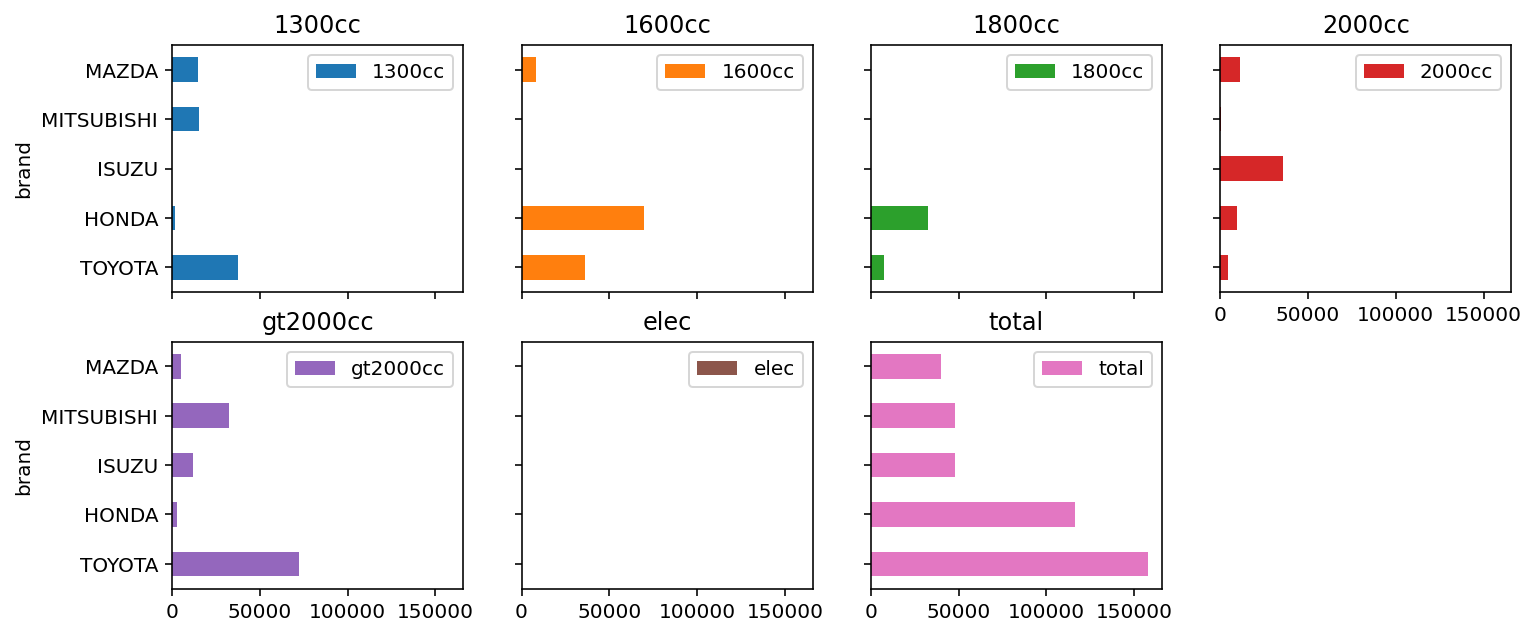

In [ ]:
df.drop(['month'], axis=1).groupby('brand').sum().nlargest(5, 'total') \
	.plot(kind='barh', subplots=True, layout=(2,4), figsize=(12,5), sharey=True)
plt.show()

# DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df['cty_kml'] = round(df['cty'] * .425143707, 1)
df['cty_hwy'] = round(df['cty'] * .425143707, 1)
df['trans_am'] = df['trans'].str[0]
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_kml,cty_hwy,trans_am
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,7.7,7.7,a
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8.9,8.9,m
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,8.5,8.5,m
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,8.9,8.9,a
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6.8,6.8,a


In [ ]:
df.describe()

,displ,year,cyl,cty,hwy,cty_kml,cty_hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,7.176068,7.176068
std,1.291959,4.509646,1.611534,4.255946,5.954643,1.807550,1.807550
min,1.600000,1999.000000,4.000000,9.000000,12.000000,3.800000,3.800000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,6.000000,6.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,7.200000,7.200000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,8.100000,8.100000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,14.900000,14.900000


# Series

In [ ]:
sales = pd.Series([20, 12, 18, 10])
sales

0    20
1    12
2    18
3    10
dtype: int64

In [ ]:
sales.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
sales[1:3]

1    12
2    18
dtype: int64

In [ ]:
sales = pd.Series([20, 12, 18, 10], index=['Jan', 'Feb', 'Mar', 'Apr'])
sales

Jan    20
Feb    12
Mar    18
Apr    10
dtype: int64

<AxesSubplot:>

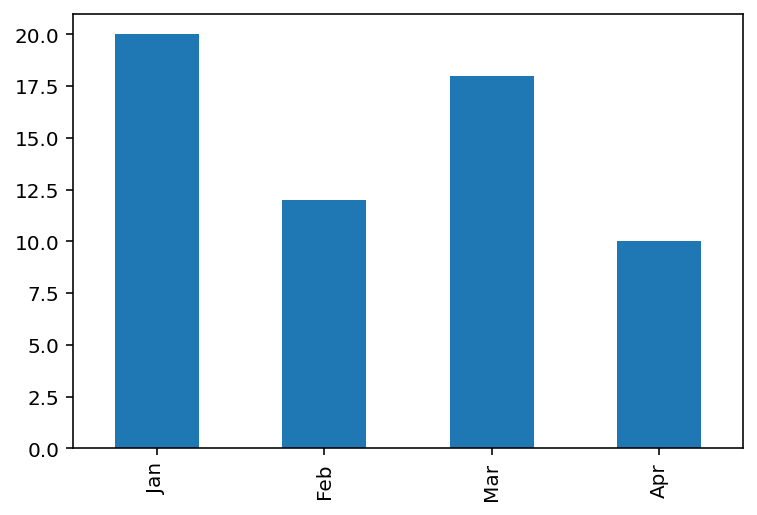

In [ ]:
sales.plot(kind='bar')

# Data Types

In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/employee.tsv')
df.head()

,gender,dob,occupation,work_exp,salary,own_house,children
0,M,31-Jul-89,nurse,2.2,223700.0,True,1
1,NaN,30-Oct-92,dentist,6.7,121100.0,True,1
2,F,NaN,accountant,9.0,NaN,False,2
3,F,17-Sep-87,engineer,1.7,79900.0,False,0
4,M,24-Jan-93,teacher,3.6,32800.0,False,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/employee.tsv', parse_dates=['dob'])
df.head()

,gender,dob,occupation,work_exp,salary,own_house,children
0,M,1989-07-31,nurse,2.2,223700.0,True,1
1,NaN,1992-10-30,dentist,6.7,121100.0,True,1
2,F,NaT,accountant,9.0,NaN,False,2
3,F,1987-09-17,engineer,1.7,79900.0,False,0
4,M,1993-01-24,teacher,3.6,32800.0,False,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   gender      9 non-null      object        
 1   dob         8 non-null      datetime64[ns]
 2   occupation  10 non-null     object        
 3   work_exp    10 non-null     float64       
 4   salary      8 non-null      float64       
 5   own_house   10 non-null     bool          
 6   children    10 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 618.0+ bytes


In [ ]:
df['occupation'].value_counts()

teacher       2
nurse         2
lawyer        1
engineer      1
developer     1
accountant    1
police        1
dentist       1
Name: occupation, dtype: int64

In [ ]:
df['occupation'].str.upper()

0         NURSE
1       DENTIST
2    ACCOUNTANT
3      ENGINEER
4       TEACHER
5     DEVELOPER
6         NURSE
7        LAWYER
8       TEACHER
9        POLICE
Name: occupation, dtype: object

In [ ]:
df['age'] = pd.to_datetime('today').year - df['dob'].dt.year
df['dayname'] = df['dob'].dt.day_name()
df.head()

,gender,dob,occupation,work_exp,salary,own_house,children,age,dayname
0,M,1989-07-31,nurse,2.2,223700.0,True,1,33.0,Monday
1,NaN,1992-10-30,dentist,6.7,121100.0,True,1,30.0,Friday
2,F,NaT,accountant,9.0,NaN,False,2,NaN,NaN
3,F,1987-09-17,engineer,1.7,79900.0,False,0,35.0,Thursday
4,M,1993-01-24,teacher,3.6,32800.0,False,2,29.0,Sunday


# Basic Stat

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
manufacturer,234,15,dodge,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,234,38,caravan 2wd,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displ,234.0,NaN,NaN,NaN,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
year,234.0,NaN,NaN,NaN,2003.5,4.509646,1999.0,1999.0,2003.5,2008.0,2008.0
cyl,234.0,NaN,NaN,NaN,5.888889,1.611534,4.0,4.0,6.0,8.0,8.0
trans,234,10,auto(l4),83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drv,234,3,f,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cty,234.0,NaN,NaN,NaN,16.858974,4.255946,9.0,14.0,17.0,19.0,35.0
hwy,234.0,NaN,NaN,NaN,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0
fl,234,5,r,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [ ]:
df.nlargest(5, 'cty')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/thai_provinces.csv')
pd.concat([df.head(3), df.tail(3)])

,provinceID,provinceTh,provinceEn,regionID,areaKm2
0,นม,นครราชสีมา,Nakhon Ratchasima,NE,20493.964
1,ชม,เชียงใหม่,Chiang Mai,N,20107.057
2,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
74,ภก,ภูเก็ต,Phuket,S,543.034
75,สส,สมุทรสงคราม,Samut Songkhram,C,416.707
76,บก,บึงกาฬ,Bueng Kan,NE,4305.000


In [ ]:
df.sample(frac=.1) # Randomize 10% of data

,provinceID,provinceTh,provinceEn,regionID,areaKm2
8,พช,เพชรบูรณ์,Phetchabun,N,12668.416
34,พย,พะเยา,Phayao,N,6335.060
13,ลย,เลย,Loei,NE,11424.612
66,ปน,ปัตตานี,Pattani,S,1940.356
30,สท,สุโขทัย,Sukhothai,N,6596.092
5,สฎ,สุราษฎร์ธานี,Surat Thani,S,12891.469
35,พบ,เพชรบุรี,Phetchaburi,C,6225.138
26,นค,หนองคาย,Nong Khai,NE,7332.280


# Graph

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/oil_gold_setindex.csv', index_col='Date', parse_dates=True)
df.head()

,Oil,Gold,SET
Date,,,
2003-01-31,30.71,356.859,370.01
2003-02-28,32.63,358.970,361.32
2003-03-31,27.22,340.550,364.55
2003-04-30,23.72,328.180,374.63
2003-05-31,26.71,355.683,403.82


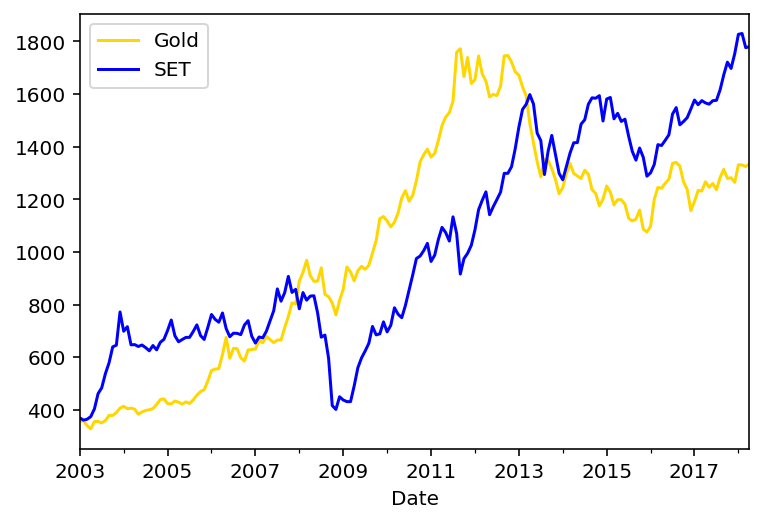

In [ ]:
df[['Gold', 'SET']].plot(kind='line', color=('gold', 'b'))
plt.show()

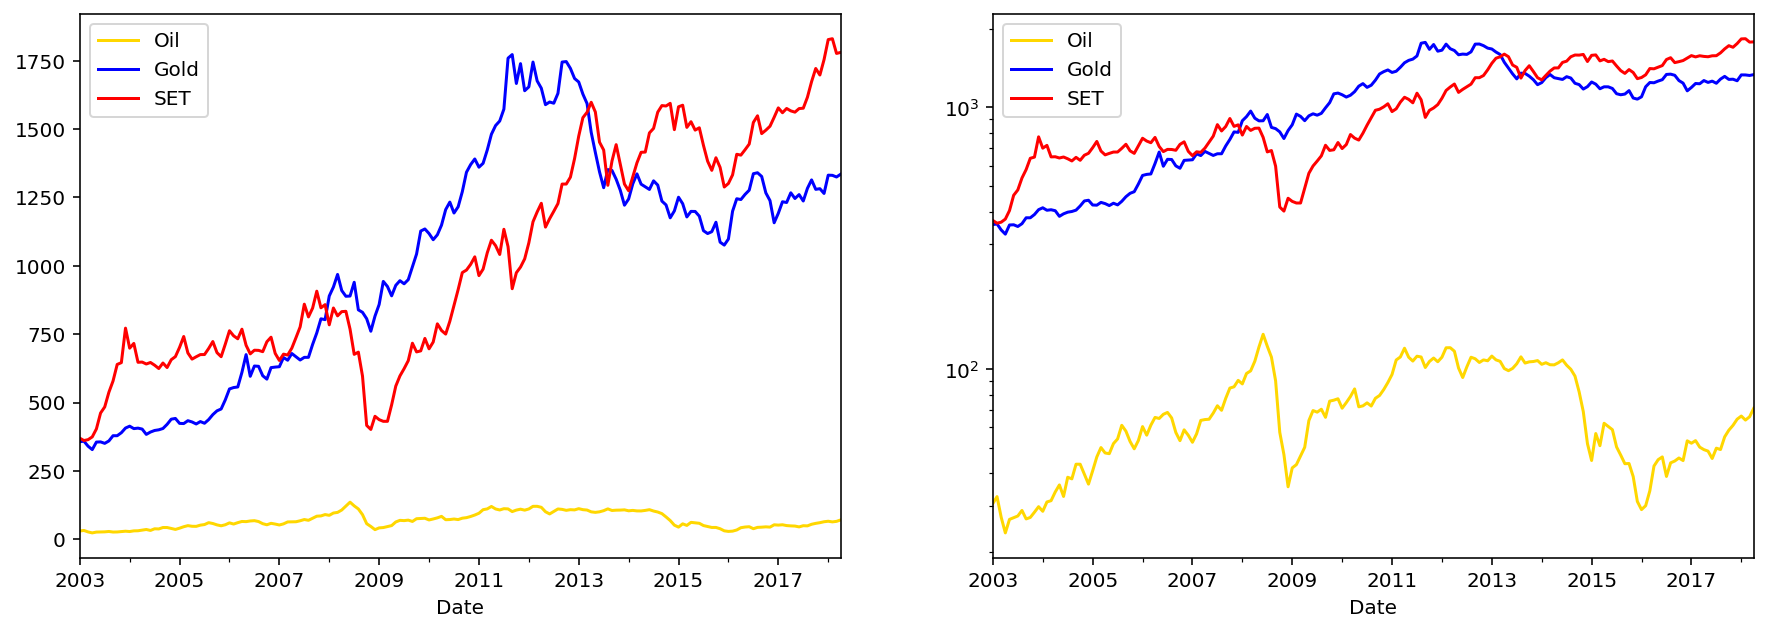

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind='line', logy=False, color=['gold', 'b', 'r'], ax=ax[0])
df.plot(kind='line', logy=True, color=['gold', 'b', 'r'], ax=ax[1])
plt.show()

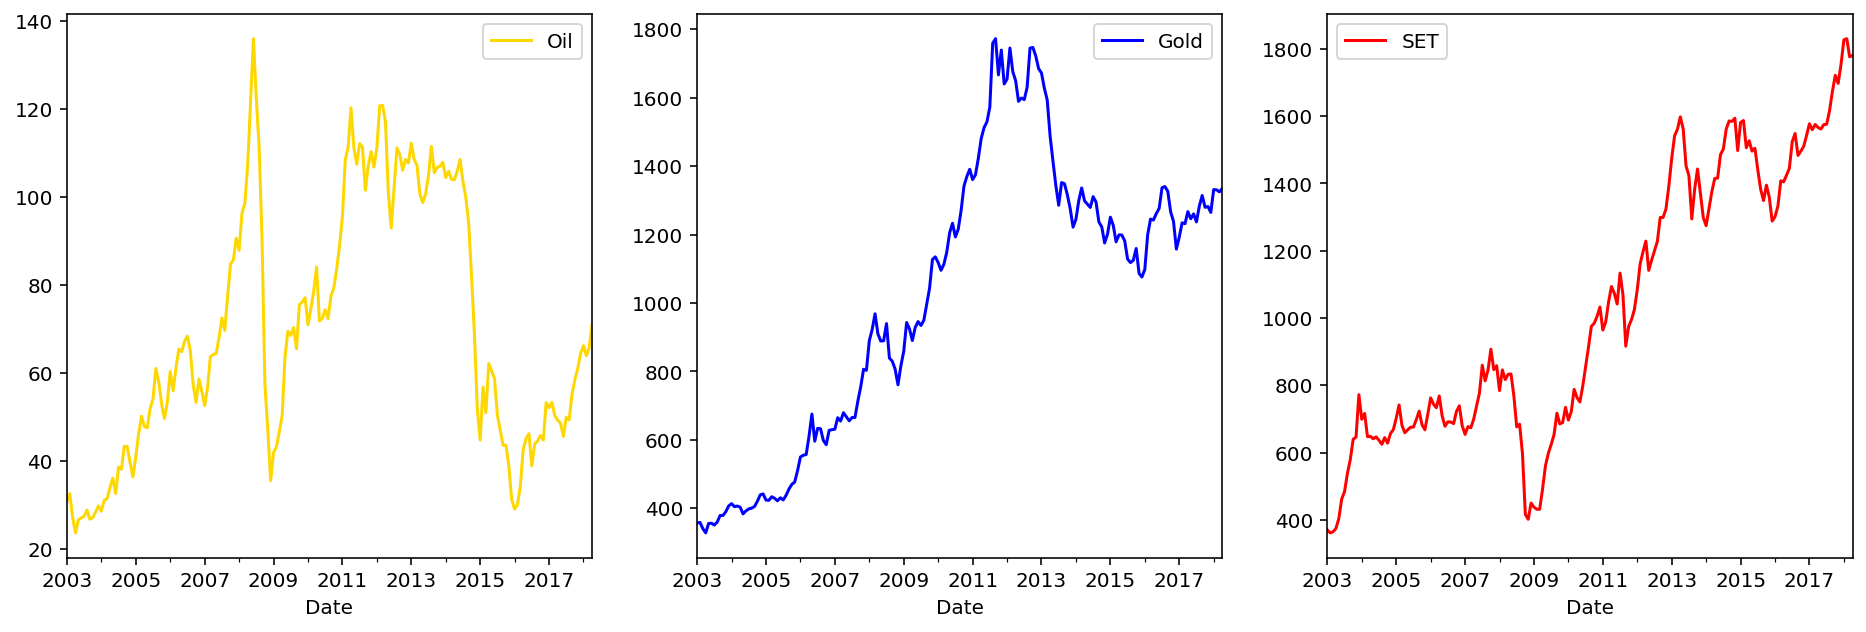

In [ ]:
df.plot(kind='line', subplots=True, layout=(1,3), figsize=(16,5), color=('gold', 'b', 'r'))
plt.show()

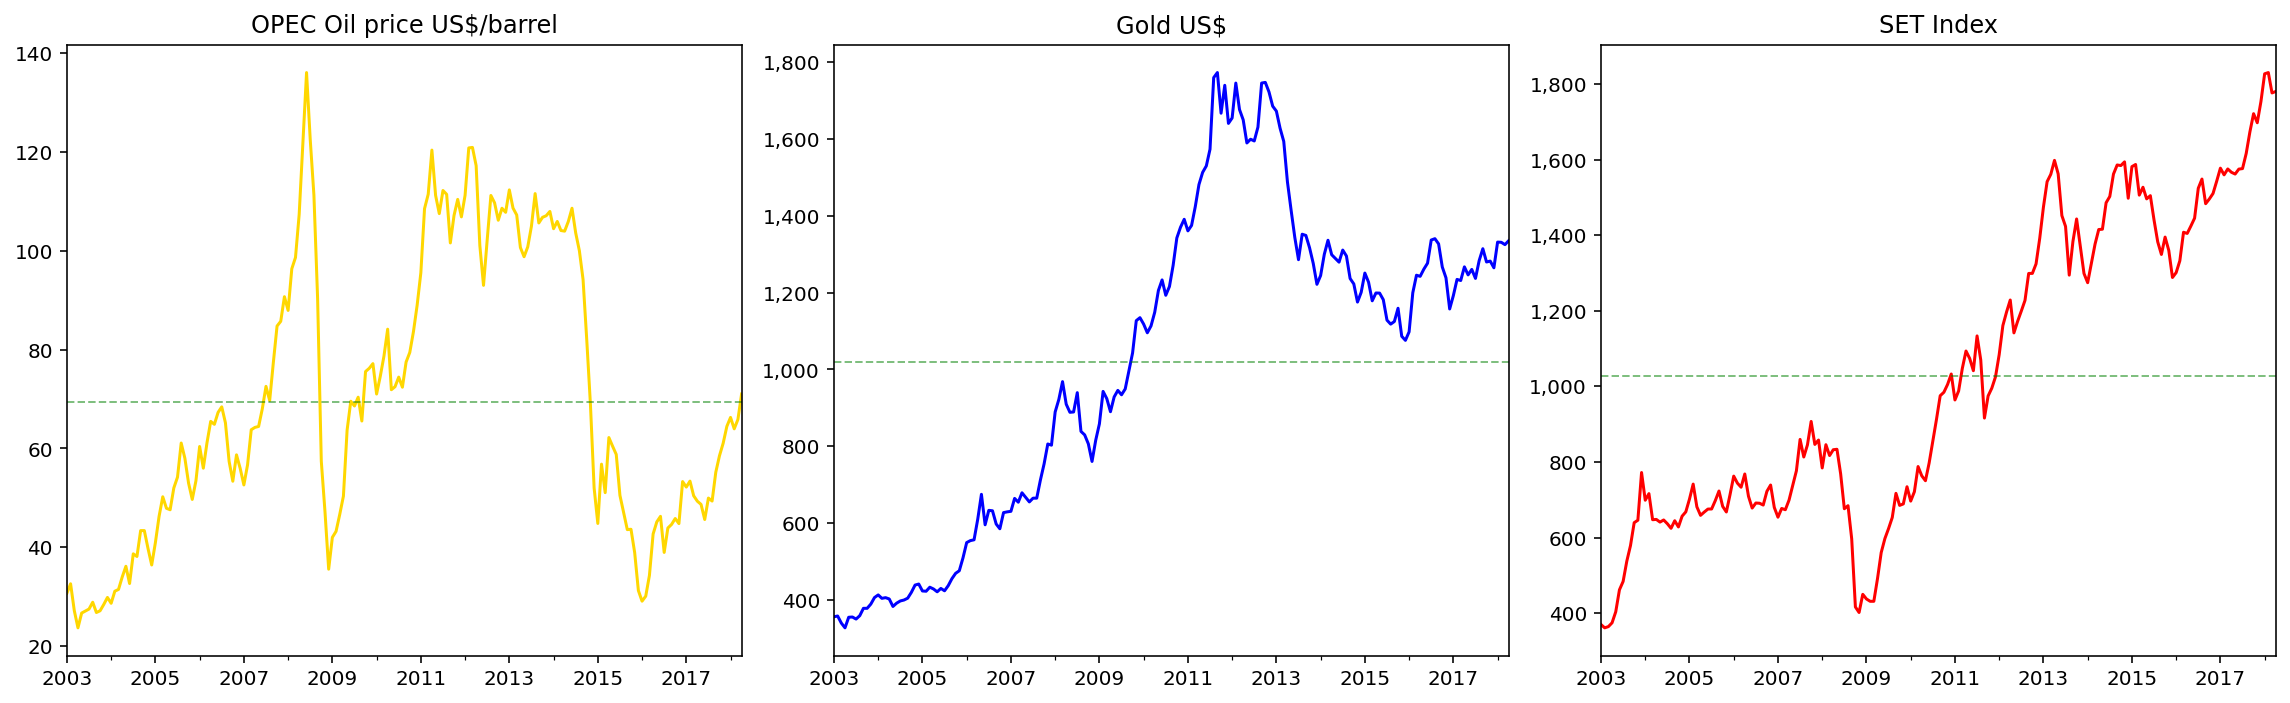

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
s = ['Oil', 'Gold', 'SET']
title = ['OPEC Oil price US$/barrel', 'Gold US$', 'SET Index']
color = ['gold', 'b', 'r']

for i in range(len(s)):
    ax0=df.loc['2003-01-31':, s[i]].plot(kind='line', color=color[i], title=title[i], ax=ax[i])
    ax0.axhline(df.loc['2003-01-31':, s[i]].mean(), color='g', alpha=.5, linestyle='--', linewidth=1)
    ax0.set_xlabel('')
    ax0.set_ylabel('')
    ax0.yaxis.set_major_formatter(FuncFormatter(lambda v, p: '{:,.0f}'.format(v)))
    
plt.tight_layout()
plt.show()

# Select Columns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/score.csv')
df.head()

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3
0,1,M,6,8,9,4,11,12,5,19,9
1,2,M,5,8,8,10,15,9,15,18,20
2,3,M,9,8,10,14,8,13,6,10,14
3,4,F,10,9,7,4,8,13,20,8,15
4,5,F,5,10,6,13,10,14,8,12,16


In [ ]:
df[['eng1', 'eng2', 'eng3']]

,eng1,eng2,eng3
0,4,11,12
1,10,15,9
2,14,8,13
3,4,8,13
4,13,10,14
5,12,7,9
6,4,7,15
7,15,12,11
8,8,12,11
9,7,15,12


In [ ]:
df.loc[:, 'eng2':'eng3']

,eng2,eng3
0,11,12
1,15,9
2,8,13
3,8,13
4,10,14
5,7,9
6,7,15
7,12,11
8,12,11
9,15,12


In [ ]:
df.columns

Index(['studentID', 'gender', 'math1', 'math2', 'math3', 'eng1', 'eng2',
       'eng3', 'sci1', 'sci2', 'sci3'],
      dtype='object')

In [ ]:
df.columns.str.contains('eng')

array([False, False, False, False, False,  True,  True,  True, False,
       False, False])

In [ ]:
df.columns[df.columns.str.contains('eng')]

Index(['eng1', 'eng2', 'eng3'], dtype='object')

In [ ]:
df[df.columns[df.columns.str.contains('eng')]]

,eng1,eng2,eng3
0,4,11,12
1,10,15,9
2,14,8,13
3,4,8,13
4,13,10,14
5,12,7,9
6,4,7,15
7,15,12,11
8,8,12,11
9,7,15,12


In [ ]:
df[df.columns[df.columns.str.contains('1')]]

,math1,eng1,sci1
0,6,4,5
1,5,10,15
2,9,14,6
3,10,4,20
4,5,13,8
5,4,12,16
6,4,4,17
7,10,15,18
8,9,8,17
9,8,7,6


In [ ]:
df[df.columns[df.columns.str.match(r'\w+1$')]] # w charactor [a-z], [0-9]

,math1,eng1,sci1
0,6,4,5
1,5,10,15
2,9,14,6
3,10,4,20
4,5,13,8
5,4,12,16
6,4,4,17
7,10,15,18
8,9,8,17
9,8,7,6


In [ ]:
df[df.columns[df.columns.str.match(r'\w+[12]$')]] # w = charactor [a-z], [0-9]

,math1,math2,eng1,eng2,sci1,sci2
0,6,8,4,11,5,19
1,5,8,10,15,15,18
2,9,8,14,8,6,10
3,10,9,4,8,20,8
4,5,10,13,10,8,12
5,4,10,12,7,16,10
6,4,7,4,7,17,16
7,10,6,15,12,18,10
8,9,9,8,12,17,17
9,8,10,7,15,6,12


In [ ]:
df['math_total'] = df['math1'] + df['math2'] + df['math3']
df.head()

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3,math_total
0,1,M,6,8,9,4,11,12,5,19,9,23
1,2,M,5,8,8,10,15,9,15,18,20,21
2,3,M,9,8,10,14,8,13,6,10,14,27
3,4,F,10,9,7,4,8,13,20,8,15,26
4,5,F,5,10,6,13,10,14,8,12,16,21


In [ ]:
df.columns.str.match(r'^math\d{1,}') # \d = number [0-9]

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False])

In [ ]:
df.columns[df.columns.str.match(r'^math\d{1,}')] # \d = number [0-9]

Index(['math1', 'math2', 'math3'], dtype='object')

In [ ]:
df['math_total'] = df[df.columns[df.columns.str.match(r'^math\d{1,}')]].sum(axis=1)
df['eng_total'] = df[df.columns[df.columns.str.match(r'^eng\d{1,}')]].sum(axis=1)
df['sci_total'] = df[df.columns[df.columns.str.match(r'^sci\d{1,}')]].sum(axis=1)
df['math_total1'] = df[['math1', 'math2', 'math3']].sum(axis=1)
df.head()

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3,math_total,eng_total,sci_total,math_total1
0,1,M,6,8,9,4,11,12,5,19,9,23,27,33,23
1,2,M,5,8,8,10,15,9,15,18,20,21,34,53,21
2,3,M,9,8,10,14,8,13,6,10,14,27,35,30,27
3,4,F,10,9,7,4,8,13,20,8,15,26,25,43,26
4,5,F,5,10,6,13,10,14,8,12,16,21,37,36,21


In [ ]:
del df['math_total1']
df.head()

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3,math_total,eng_total,sci_total
0,1,M,6,8,9,4,11,12,5,19,9,23,27,33
1,2,M,5,8,8,10,15,9,15,18,20,21,34,53
2,3,M,9,8,10,14,8,13,6,10,14,27,35,30
3,4,F,10,9,7,4,8,13,20,8,15,26,25,43
4,5,F,5,10,6,13,10,14,8,12,16,21,37,36


In [ ]:
df['total'] = df[df.columns[df.columns.str.match(r'.*total$')]].sum(axis=1)
# df['total'] = df[df.columns[df.columns.str.match(r'_total$')]].sum(axis=1)
df.head()

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3,math_total,eng_total,sci_total,total
0,1,M,6,8,9,4,11,12,5,19,9,23,27,33,83
1,2,M,5,8,8,10,15,9,15,18,20,21,34,53,108
2,3,M,9,8,10,14,8,13,6,10,14,27,35,30,92
3,4,F,10,9,7,4,8,13,20,8,15,26,25,43,94
4,5,F,5,10,6,13,10,14,8,12,16,21,37,36,94


In [ ]:
df.columns[df.columns.str.contains('math|sci')]

Index(['math1', 'math2', 'math3', 'sci1', 'sci2', 'sci3', 'math_total',
       'sci_total'],
      dtype='object')

In [ ]:
df.columns[df.columns.str.contains('^(math|sci)\d{1,}')]

Index(['math1', 'math2', 'math3', 'sci1', 'sci2', 'sci3'], dtype='object')

In [ ]:
df[df.columns[df.columns.str.contains('^(math|sci)\d{1,}')]]

,math1,math2,math3,sci1,sci2,sci3
0,6,8,9,5,19,9
1,5,8,8,15,18,20
2,9,8,10,6,10,14
3,10,9,7,20,8,15
4,5,10,6,8,12,16
5,4,10,8,16,10,15
6,4,7,8,17,16,20
7,10,6,10,18,10,8
8,9,9,8,17,17,10
9,8,10,6,6,12,20


# loc

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mtcars.csv', index_col='model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.loc['Datsun 710']

mpg      22.80
cyl       4.00
disp    108.00
hp       93.00
drat      3.85
wt        2.32
qsec     18.61
vs        1.00
am        1.00
gear      4.00
carb      1.00
Name: Datsun 710, dtype: float64

In [ ]:
df.loc[['Datsun 710']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1


In [ ]:
df.loc[['Datsun 710'], 'mpg']

model
Datsun 710    22.8
Name: mpg, dtype: float64

In [ ]:
df.loc[['Datsun 710', 'Merc 230']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


In [ ]:
df.loc[['Datsun 710', 'Merc 230'], 'mpg':'hp']

,mpg,cyl,disp,hp
model,,,,
Datsun 710,22.8,4,108.0,93
Merc 230,22.8,4,140.8,95


In [ ]:
df.loc[['Datsun 710', 'Merc 230'], ['mpg','hp']]

,mpg,hp
model,,
Datsun 710,22.8,93
Merc 230,22.8,95


In [ ]:
df.loc['Datsun 710':'Merc 230'] # inclusive!!!

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
df.loc['Datsun 710':'Merc 230', 'hp':'gear'] # inclusive!!!

,hp,drat,wt,qsec,vs,am,gear
model,,,,,,,
Datsun 710,93,3.85,2.320,18.61,1,1,4
Hornet 4 Drive,110,3.08,3.215,19.44,1,0,3
Hornet Sportabout,175,3.15,3.440,17.02,0,0,3
Valiant,105,2.76,3.460,20.22,1,0,3
Duster 360,245,3.21,3.570,15.84,0,0,3
Merc 240D,62,3.69,3.190,20.00,1,0,4
Merc 230,95,3.92,3.150,22.90,1,0,4


In [ ]:
df.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')

In [ ]:
df.index.str.contains('Merc')

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
df.loc[df.index.str.contains('Merc')]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4
Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.6,0,0,3,3
Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.0,0,0,3,3


In [ ]:
df.loc[df.index.str.contains('Merc'), 'mpg']

model
Merc 240D      24.4
Merc 230       22.8
Merc 280       19.2
Merc 280C      17.8
Merc 450SE     16.4
Merc 450SL     17.3
Merc 450SLC    15.2
Name: mpg, dtype: float64

In [ ]:
df.loc[df.index.str.contains('Merc'), 'mpg':'hp']

,mpg,cyl,disp,hp
model,,,,
Merc 240D,24.4,4,146.7,62
Merc 230,22.8,4,140.8,95
Merc 280,19.2,6,167.6,123
Merc 280C,17.8,6,167.6,123
Merc 450SE,16.4,8,275.8,180
Merc 450SL,17.3,8,275.8,180
Merc 450SLC,15.2,8,275.8,180


# Select Column technique

In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/score_a.tsv', index_col='studentid')
df.head()

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9
C211,6,10,8,10,6,7,6,5,10
C305,8,5,4,6,3,7,10,10,5
B344,4,8,7,6,8,7,4,10,8
A312,9,8,10,8,6,9,5,10,9


In [ ]:
df.columns

Index(['math1', 'eng1', 'sci1', 'math2', 'eng2', 'sci2', 'math3', 'eng3',
       'sci3'],
      dtype='object')

In [ ]:
df.columns.str.contains('eng')

array([False,  True, False, False,  True, False, False,  True, False])

In [ ]:
df.loc[:, df.columns.str.contains('eng')]

,eng1,eng2,eng3
studentid,,,
C215,9,5,6
C211,10,6,5
C305,5,3,10
B344,8,8,10
A312,8,6,10
B243,6,5,6
B304,4,7,9
A349,4,6,5
C409,4,6,9


In [ ]:
df.loc[:, df.columns.str.startswith('eng')]

,eng1,eng2,eng3
studentid,,,
C215,9,5,6
C211,10,6,5
C305,5,3,10
B344,8,8,10
A312,8,6,10
B243,6,5,6
B304,4,7,9
A349,4,6,5
C409,4,6,9


In [ ]:
df.loc[:, df.columns.str.contains('2')]

,math2,eng2,sci2
studentid,,,
C215,7,5,6
C211,10,6,7
C305,6,3,7
B344,6,8,7
A312,8,6,9
B243,6,5,3
B304,6,7,4
A349,7,6,6
C409,8,6,8


In [ ]:
df.loc[:, df.columns.str.endswith('2')]

,math2,eng2,sci2
studentid,,,
C215,7,5,6
C211,10,6,7
C305,6,3,7
B344,6,8,7
A312,8,6,9
B243,6,5,3
B304,6,7,4
A349,7,6,6
C409,8,6,8


In [ ]:
df.loc[:, df.columns.str.contains('eng|sci')]

,eng1,sci1,eng2,sci2,eng3,sci3
studentid,,,,,,
C215,9,4,5,6,6,9
C211,10,8,6,7,5,10
C305,5,4,3,7,10,5
B344,8,7,8,7,10,8
A312,8,10,6,9,10,9
B243,6,6,5,3,6,6
B304,4,4,7,4,9,6
A349,4,7,6,6,5,8
C409,4,4,6,8,9,6


In [ ]:
df.index

Index(['C215', 'C211', 'C305', 'B344', 'A312', 'B243', 'B304', 'A349', 'C409',
       'C446', 'A398'],
      dtype='object', name='studentid')

In [ ]:
df.index.str.startswith('B')

array([False, False, False,  True, False,  True,  True, False, False,
       False, False])

In [ ]:
df.loc[df.index.str.startswith('B')]

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
B344,4,8,7,6,8,7,4,10,8
B243,4,6,6,6,5,3,8,6,6
B304,4,4,4,6,7,4,7,9,6


In [ ]:
df.loc[df.index.str.startswith('B'), df.columns.str.endswith('3')]

,math3,eng3,sci3
studentid,,,
B344,4,10,8
B243,8,6,6
B304,7,9,6


In [ ]:
df.loc[df.index.str.startswith('B'), df.columns.str.endswith('3')].sum(axis=1)
# df.loc[df.index.str.startswith('B'), df.columns.str.endswith('3')].mean(axis=1)

studentid
B344    22
B243    20
B304    22
dtype: int64

In [ ]:
df.columns.str.match('(math|sci)[1|3]')

array([ True, False,  True, False, False, False,  True, False,  True])

In [ ]:
df.loc[:, df.columns.str.match('(math|sci)[1|3]')]

,math1,sci1,math3,sci3
studentid,,,,
C215,10,4,7,9
C211,6,8,6,10
C305,8,4,10,5
B344,4,7,4,8
A312,9,10,5,9
B243,4,6,8,6
B304,4,4,7,6
A349,4,7,9,8
C409,4,4,10,6


# iloc (integer index)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.iloc[1]

model    Mazda RX4 Wag
mpg               21.0
cyl                  6
disp             160.0
hp                 110
drat               3.9
wt               2.875
qsec             17.02
vs                   0
am                   1
gear                 4
carb                 4
Name: 1, dtype: object

In [ ]:
df.iloc[[1]]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
df.iloc[1:4] # exclusive!!!

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [ ]:
df.iloc[1, 0]

'Mazda RX4 Wag'

In [ ]:
df.iloc[1, 0:2] # exclusive!!!

model    Mazda RX4 Wag
mpg               21.0
Name: 1, dtype: object

In [ ]:
df.iloc[[1, 6]]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [ ]:
df.iloc[[1, 6], [0, 4]]

,model,hp
1,Mazda RX4 Wag,110
6,Duster 360,245


In [ ]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [ ]:
df.columns.str.contains('mpg|hp|gear')

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False])

In [ ]:
df.iloc[:, df.columns.str.contains('model|mpg|hp|gear')]

,model,mpg,hp,gear
0,Mazda RX4,21.0,110,4
1,Mazda RX4 Wag,21.0,110,4
2,Datsun 710,22.8,93,4
3,Hornet 4 Drive,21.4,110,3
4,Hornet Sportabout,18.7,175,3
5,Valiant,18.1,105,3
6,Duster 360,14.3,245,3
7,Merc 240D,24.4,62,4
8,Merc 230,22.8,95,4
9,Merc 280,19.2,123,4


In [ ]:
df.iloc[:5, df.columns.str.contains('model|mpg|hp|gear')]

,model,mpg,hp,gear
0,Mazda RX4,21.0,110,4
1,Mazda RX4 Wag,21.0,110,4
2,Datsun 710,22.8,93,4
3,Hornet 4 Drive,21.4,110,3
4,Hornet Sportabout,18.7,175,3


In [ ]:
df.iloc[4:]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


In [ ]:
df.iloc[::2] # Select rows step by 2

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


In [ ]:
df.iloc[:, ::2] # Select columns step by 2

,model,cyl,hp,wt,vs,gear
0,Mazda RX4,6,110,2.620,0,4
1,Mazda RX4 Wag,6,110,2.875,0,4
2,Datsun 710,4,93,2.320,1,4
3,Hornet 4 Drive,6,110,3.215,1,3
4,Hornet Sportabout,8,175,3.440,0,3
5,Valiant,6,105,3.460,1,3
6,Duster 360,8,245,3.570,0,3
7,Merc 240D,4,62,3.190,1,4
8,Merc 230,4,95,3.150,1,4
9,Merc 280,6,123,3.440,1,4


# at iat

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.at['Datsun 710', 'mpg'] # scalar

22.8

In [ ]:
df.at['Datsun 710', 'mpg'] = 33
df.at['Datsun 710', 'mpg'] 

33.0

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/gapminder.csv', index_col=['country', 'year'])
df2.head()

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106

In [ ]:
df2.at[('Thailand', 1972), 'lifeExp']

60.405

In [ ]:
df2.at[('Thailand', 1972), 'lifeExp'] = 65
df2.at[('Thailand', 1972), 'lifeExp']

65.0

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mtcars.csv')
df3.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df3.iat[2,2]

4

In [ ]:
df.iat[2,1] = 24
df.iat[2,1]

24

### at, iat -> get/set scalar
### loc, iloc -> get/set multivalue

# Viz exploratory

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


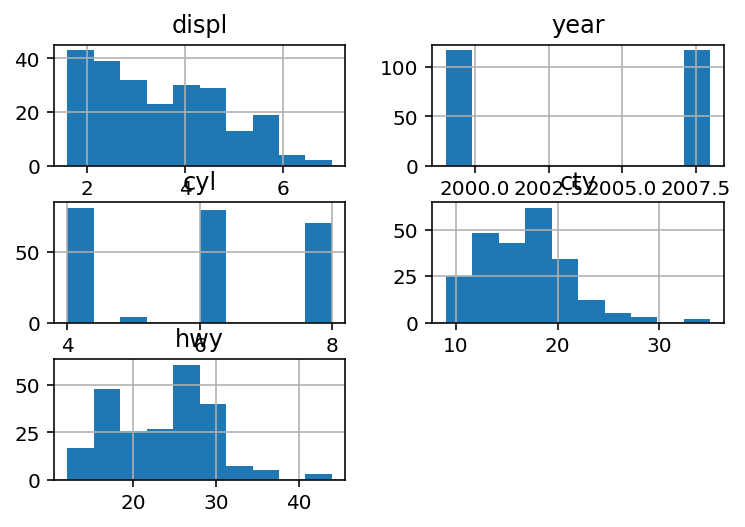

In [ ]:
df.hist();

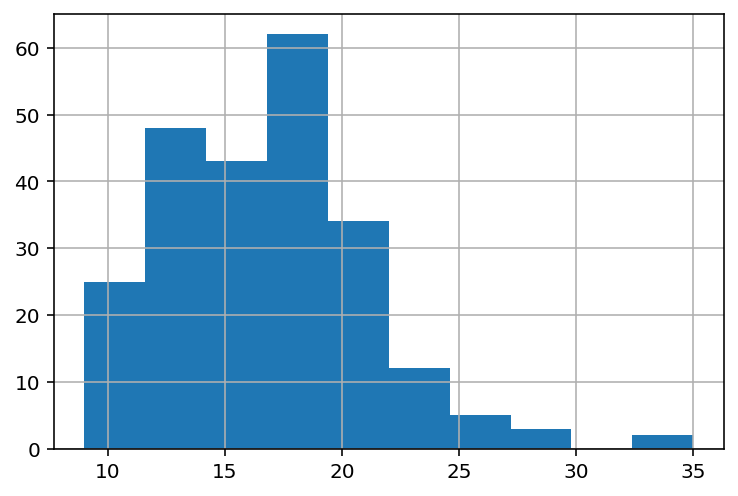

In [ ]:
df['cty'].hist();

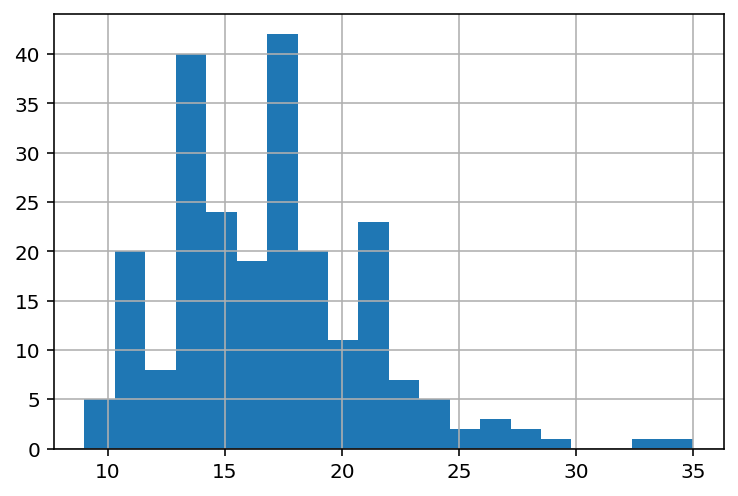

In [ ]:
df['cty'].hist(bins=20);

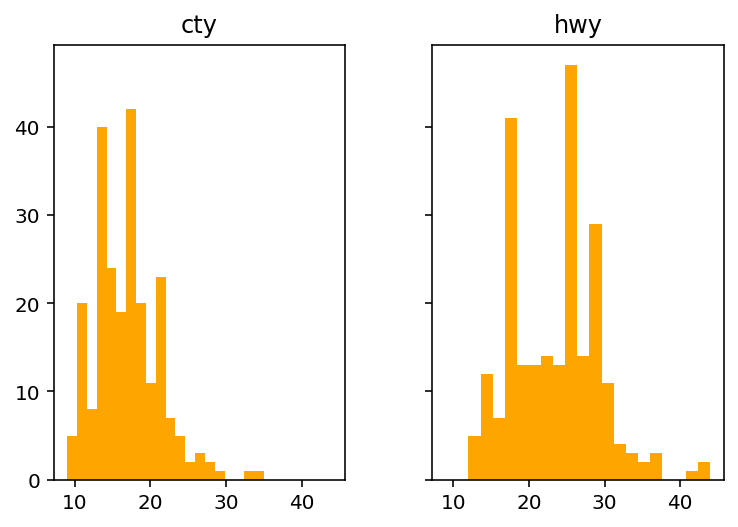

In [ ]:
df[['cty', 'hwy']].hist(bins=20, grid=False, color='orange', sharex=True, sharey=True);

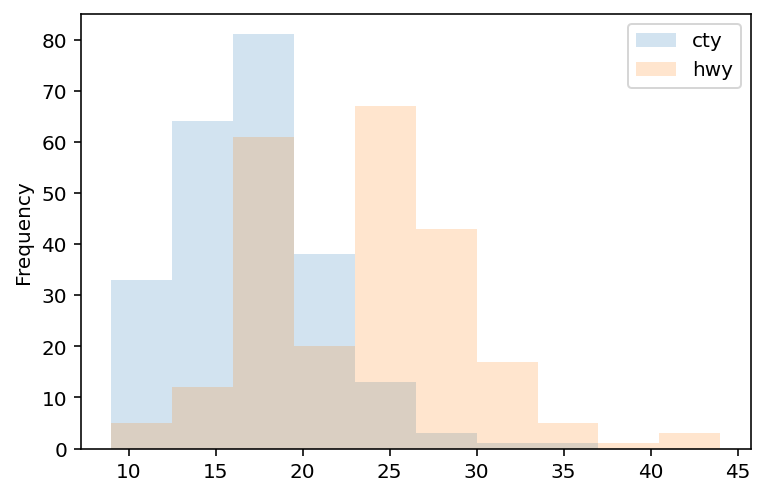

In [ ]:
df[['cty', 'hwy']].plot.hist(alpha=.2);

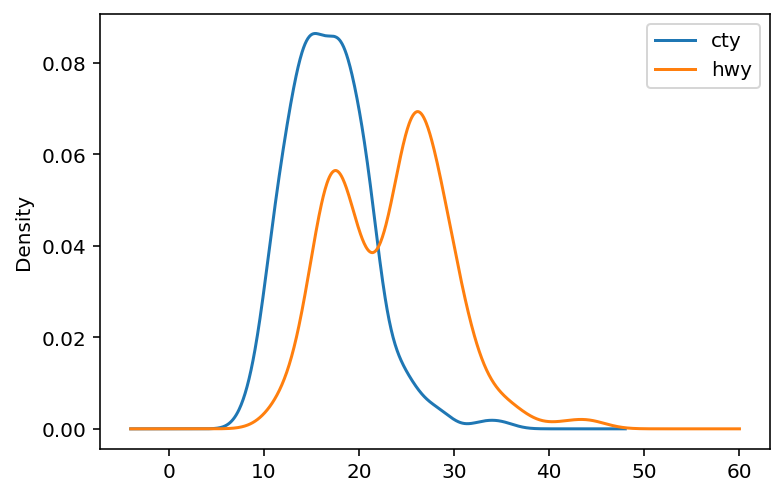

In [ ]:
df[['cty', 'hwy']].plot.density();

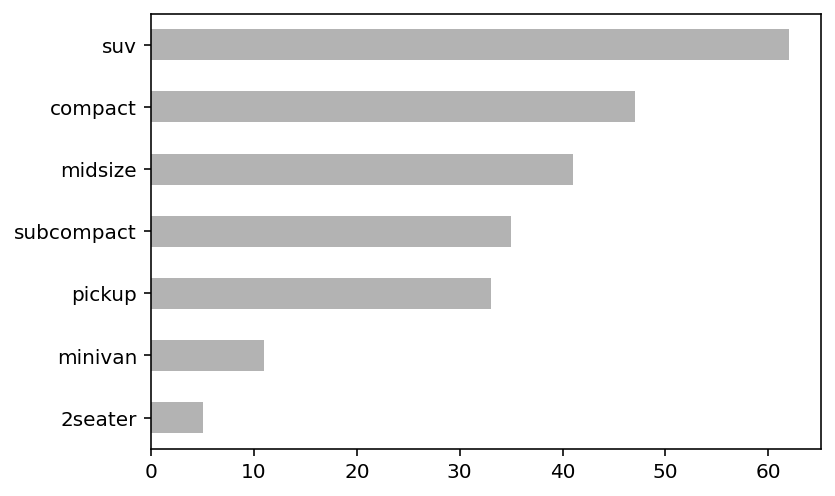

In [ ]:
df['class'].value_counts().sort_values().plot.barh(color='.7');

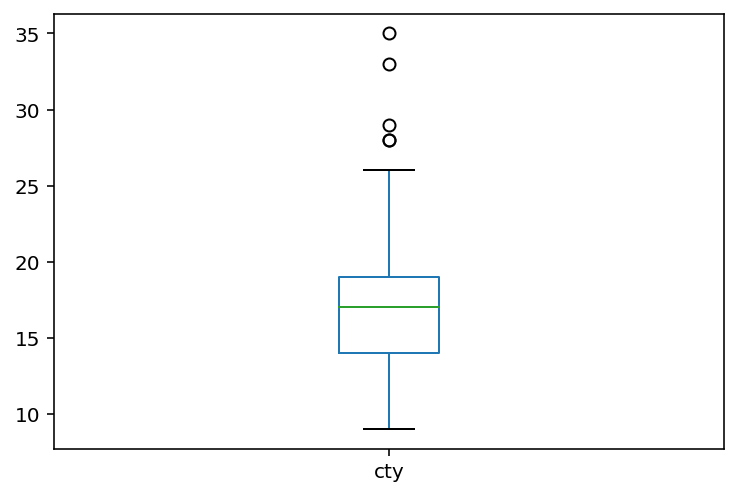

In [ ]:
df['cty'].plot.box();

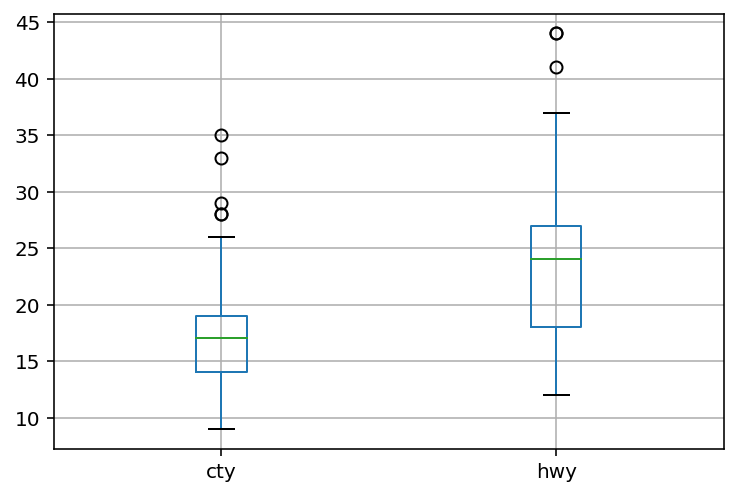

In [ ]:
df[['cty', 'hwy']].boxplot();
# df.boxplot(column=['cty', 'hwy']);

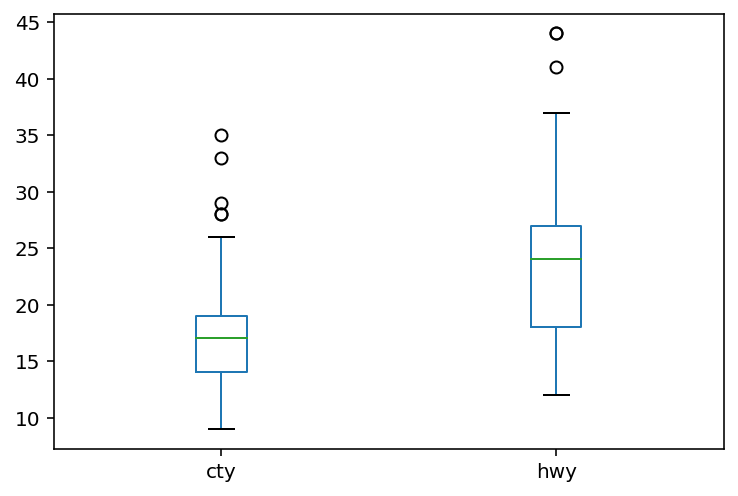

In [ ]:
df[['cty', 'hwy']].plot.box();

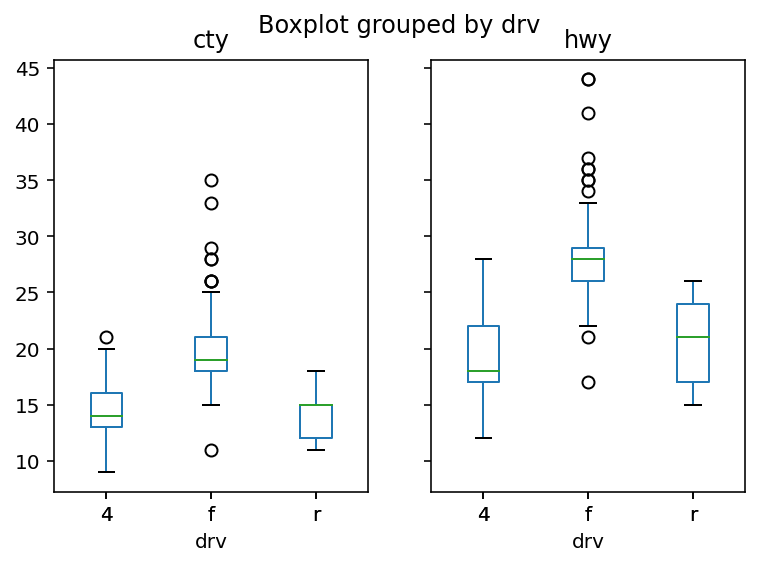

In [ ]:
df.boxplot(column=['cty', 'hwy'], by='drv', grid=False);

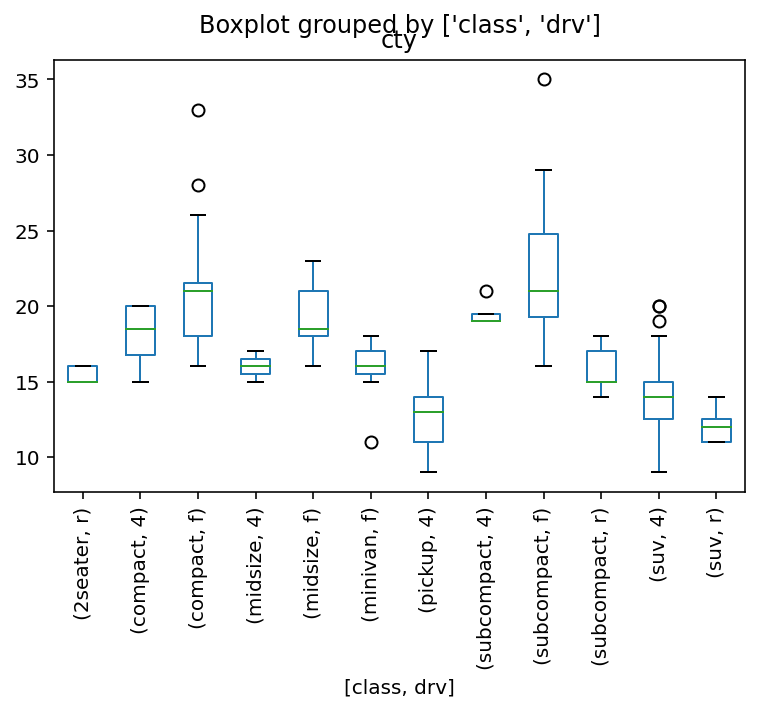

In [ ]:
df.boxplot(column='cty', by=['class', 'drv'], grid=False, rot=90);

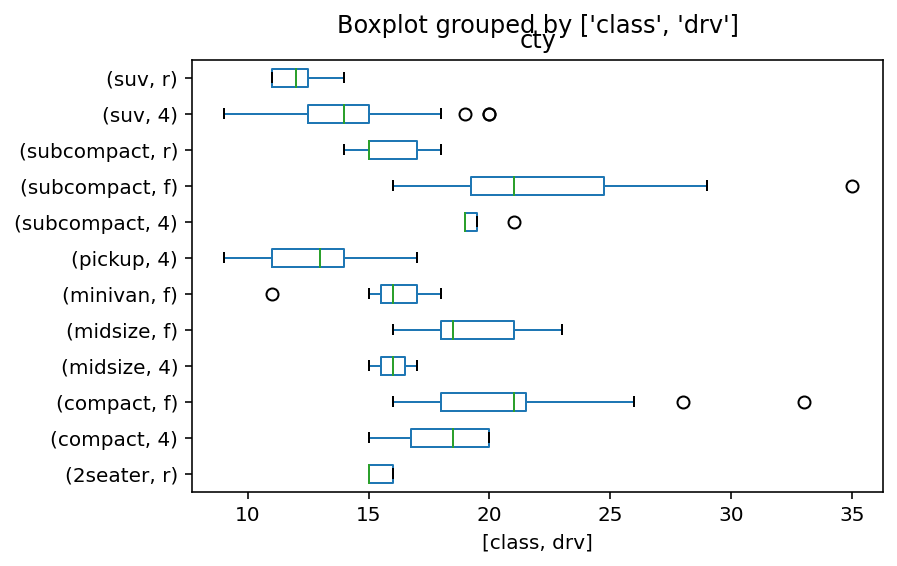

In [ ]:
df.boxplot(column='cty', by=['class', 'drv'], grid=False, vert=False);

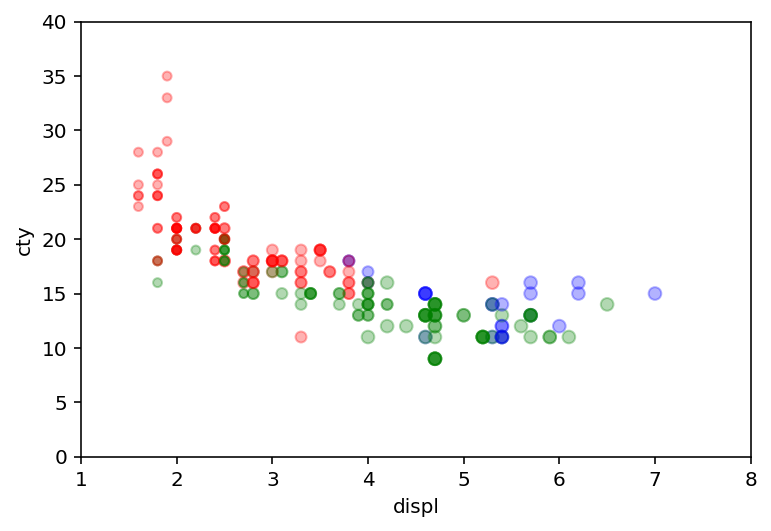

In [ ]:
df.plot.scatter(x='displ', y='cty', 
                c=df['drv'].map({'4':'g', 'f':'r', 'r':'b'}),
                s=df['cyl']*5,
                alpha=.3,
                ylim=(0,40),
                xlim=(1,8));

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/pisa2015.csv')
df.head()

,Country,Maths,Science,Reading
0,Singapore,564,556,535
1,Hong Kong,548,523,527
2,Macau,544,529,509
3,Taiwan,542,532,497
4,Japan,532,538,516


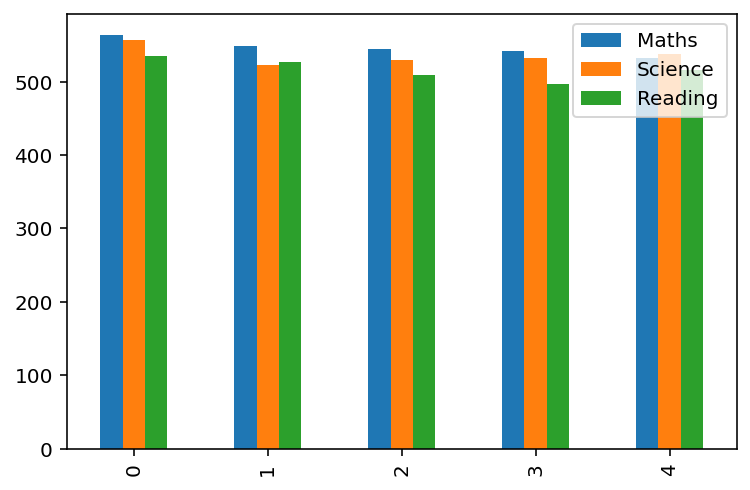

In [ ]:
df[:5].plot(kind='bar');

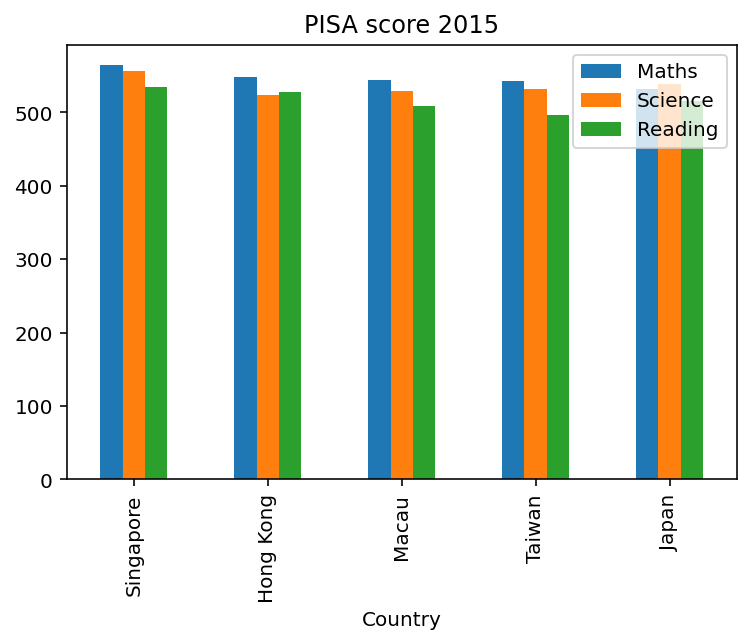

In [ ]:
df.set_index('Country')[:5].plot(kind='bar', title='PISA score 2015');

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/pisa2015.csv', index_col='Country')
df.head()

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516


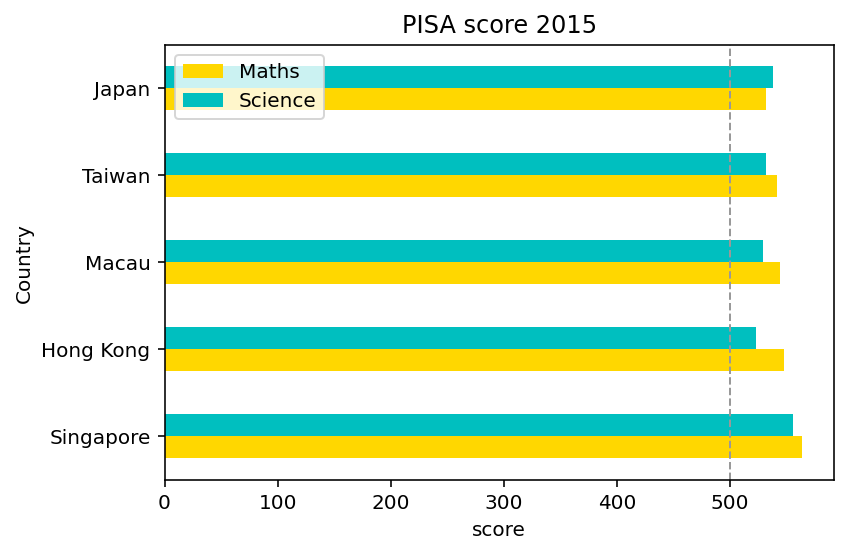

In [ ]:
ax = df[:5][['Maths', 'Science']].plot(kind='barh', color=['gold', 'c'], title='PISA score 2015');
ax.axvline(500, color='.6', linestyle='--', linewidth=1)
ax.set_xlabel('score');

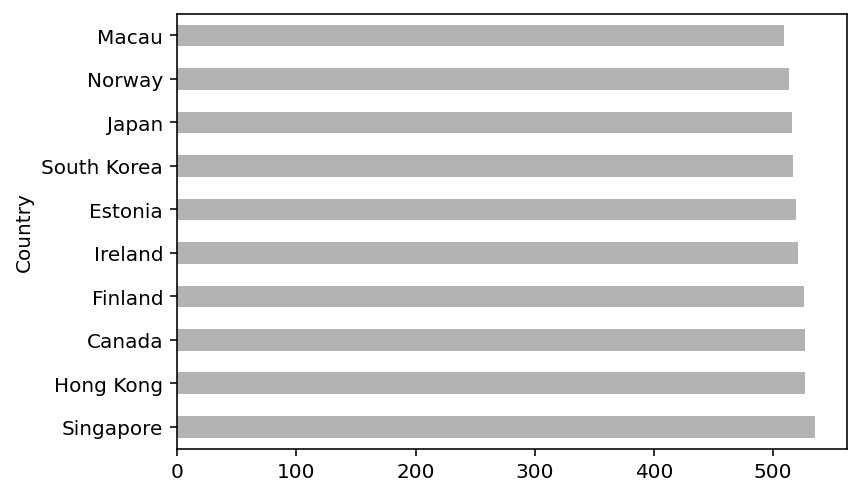

In [ ]:
df.nlargest(10, 'Reading')['Reading'].plot(kind='barh', color='.7');

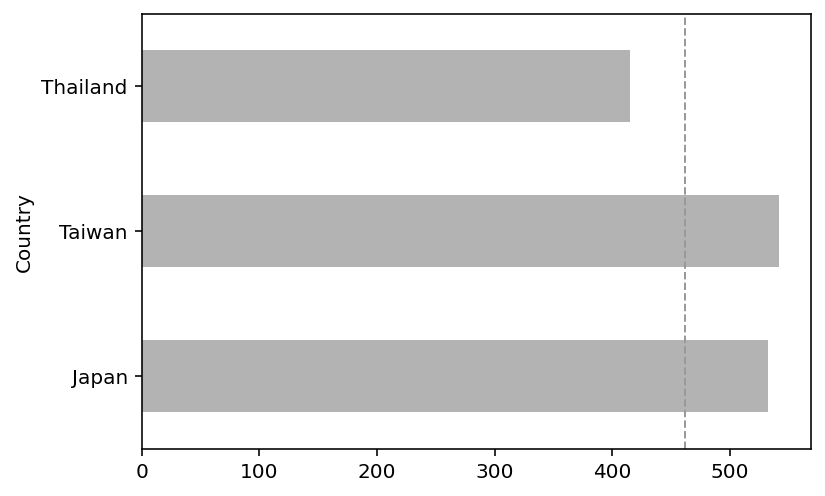

In [ ]:
avg = df['Maths'].mean()
ax = df.loc[['Japan', 'Taiwan', 'Thailand'], 'Maths'].plot(kind='barh', color='.7');
ax.axvline(avg, color='.6', linestyle='--', linewidth=1);

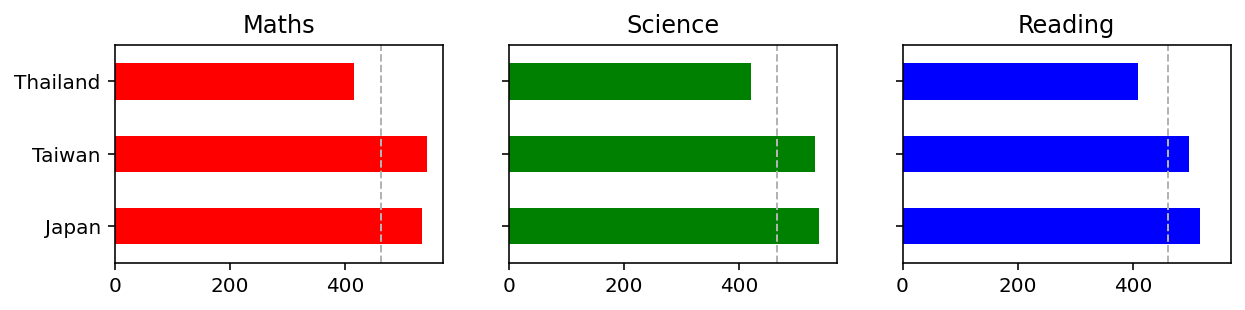

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,2))
country_list = ['Japan', 'Taiwan', 'Thailand']
color = ['r', 'g', 'b']
subject = ['Maths', 'Science', 'Reading']
for i in range(len(country_list)):
    ax0 = df.loc[country_list, subject[i]].plot(kind='barh', color=color[i], title=subject[i], ax=ax[i])
    ax0.axvline(df[subject[i]].mean(), color='.7', linestyle='--', linewidth=1)
    ax0.set_ylabel('');

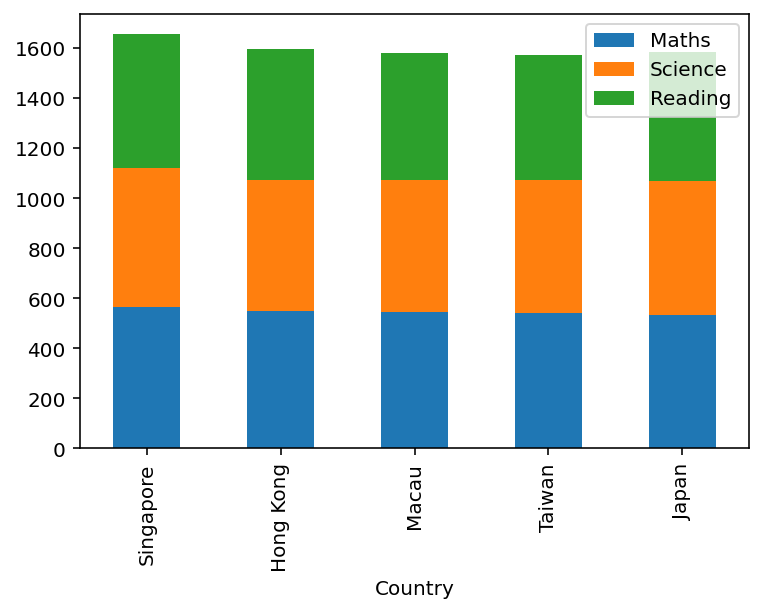

In [ ]:
df[:5].plot(kind='bar', stacked=True);

In [ ]:
df['Total'] = df['Maths'] + df['Science'] + df['Reading']
df.head()

,Maths,Science,Reading,Total
Country,,,,
Singapore,564,556,535,1655
Hong Kong,548,523,527,1598
Macau,544,529,509,1582
Taiwan,542,532,497,1571
Japan,532,538,516,1586


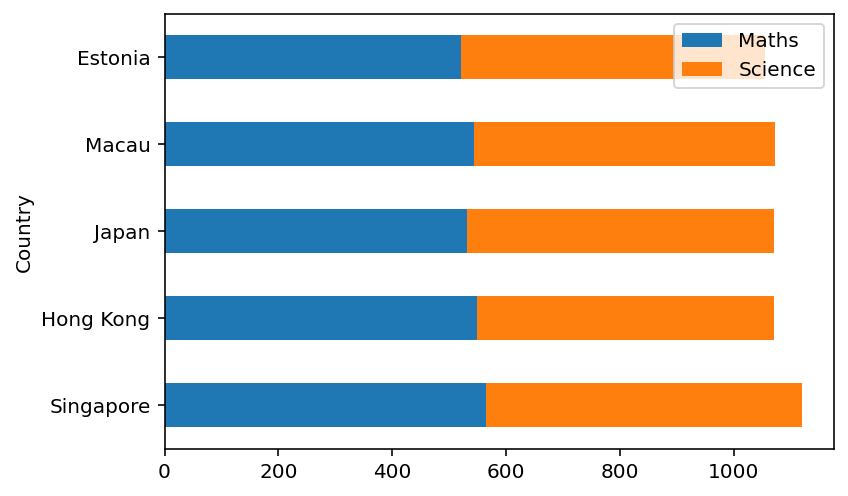

In [ ]:
df.nlargest(5, 'Total')[['Maths', 'Science']].plot(kind='barh', stacked=True);

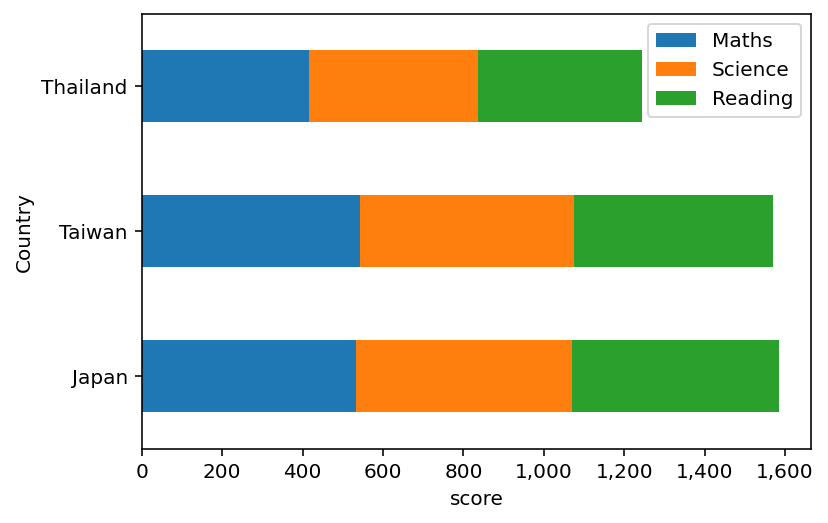

In [ ]:
ax = df.loc[['Japan', 'Taiwan', 'Thailand'], ['Maths', 'Science', 'Reading']].plot(kind='barh', stacked=True);
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))
ax.set_xlabel('score');

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/oil_gold_setindex.csv', index_col=0, parse_dates=True)
df.head()

,Oil,Gold,SET
Date,,,
2003-01-31,30.71,356.859,370.01
2003-02-28,32.63,358.970,361.32
2003-03-31,27.22,340.550,364.55
2003-04-30,23.72,328.180,374.63
2003-05-31,26.71,355.683,403.82


In [ ]:
df['oil_pct_chg'] = df['Oil'].pct_change()
df['gold_pct_chg'] = df['Gold'].pct_change()
df['set_pct_chg'] = df['SET'].pct_change()
df.head()

,Oil,Gold,SET,oil_pct_chg,gold_pct_chg,set_pct_chg
Date,,,,,,
2003-01-31,30.71,356.859,370.01,NaN,NaN,NaN
2003-02-28,32.63,358.970,361.32,0.062520,0.005916,-0.023486
2003-03-31,27.22,340.550,364.55,-0.165798,-0.051313,0.008939
2003-04-30,23.72,328.180,374.63,-0.128582,-0.036324,0.027651
2003-05-31,26.71,355.683,403.82,0.126054,0.083805,0.077917


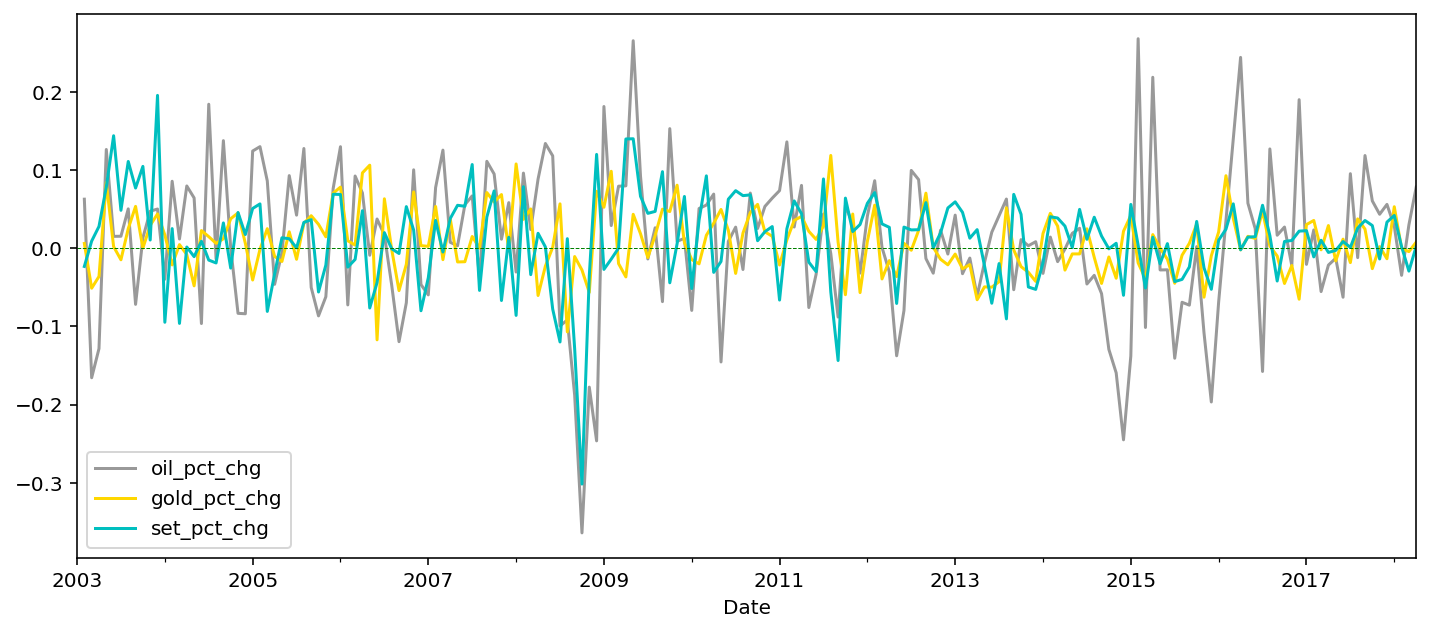

In [ ]:
cols = ['oil_pct_chg', 'gold_pct_chg', 'set_pct_chg']
color = ['.6', 'gold', 'c']

ax = df[cols].plot(kind='line', color=color, figsize=(12,5))

ax.axhline(0, color='g', linestyle='--', linewidth=.5);

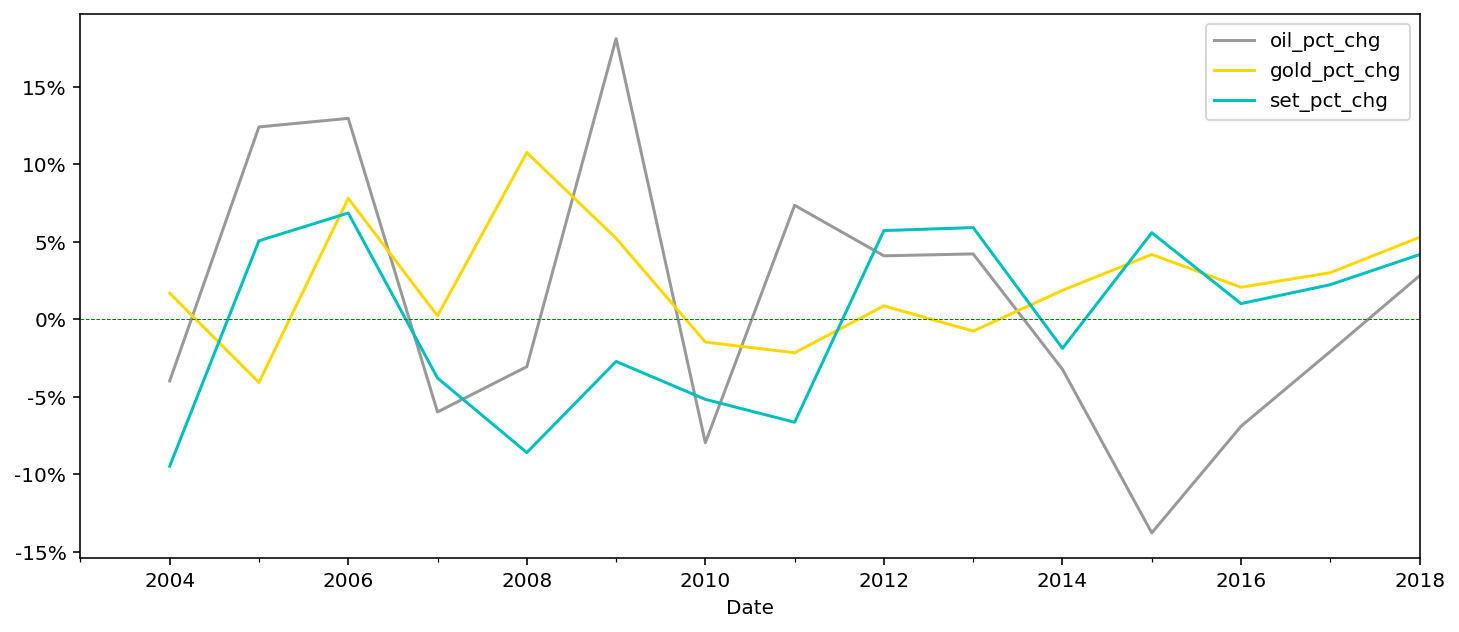

In [ ]:
cols = ['oil_pct_chg', 'gold_pct_chg', 'set_pct_chg']
color = ['.6', 'gold', 'c']

ax = df.loc[::12, cols].plot(kind='line', color=color, figsize=(12,5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:.0f}%".format(v*100)))
ax.axhline(0, color='g', linestyle='--', linewidth=.5);

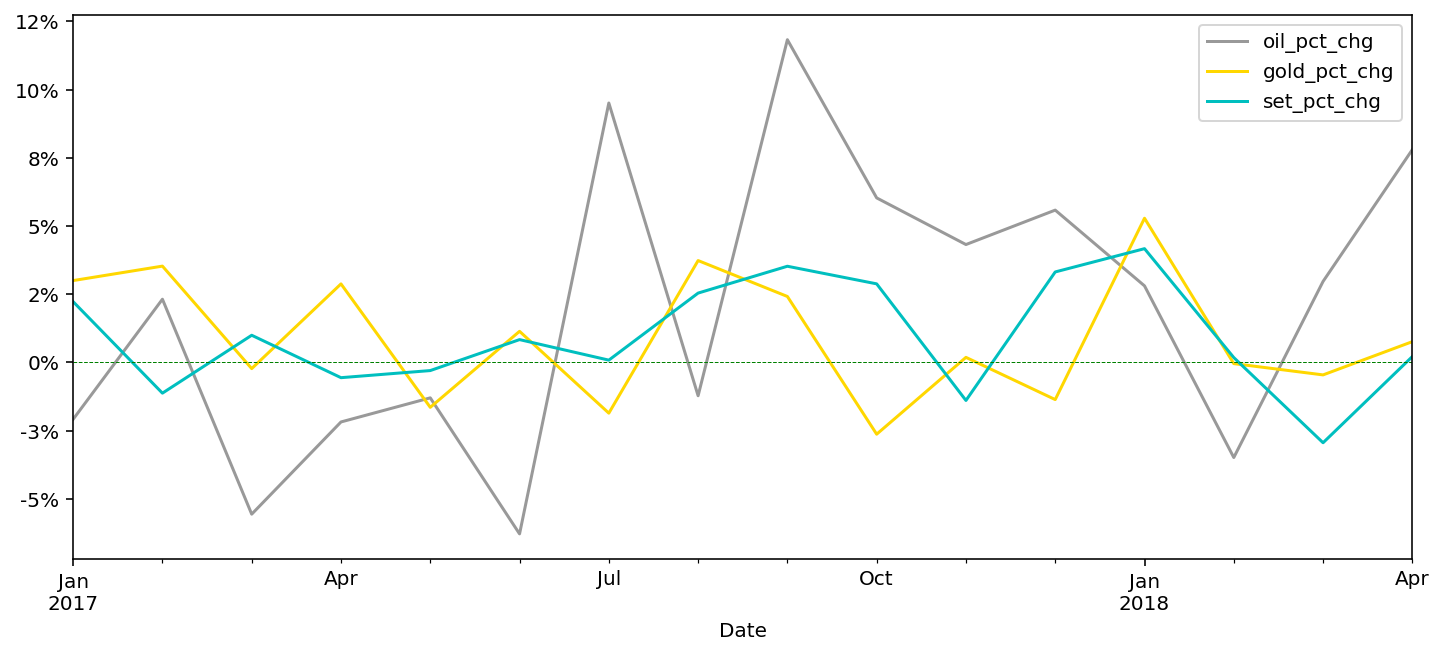

In [ ]:
cols = ['oil_pct_chg', 'gold_pct_chg', 'set_pct_chg']
color = ['.6', 'gold', 'c']

ax = df.loc['2017-01-31':, cols].plot(kind='line', color=color, figsize=(12,5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:.0f}%".format(v*100)))
ax.axhline(0, color='g', linestyle='--', linewidth=.5);

In [ ]:
base_date = '2003-01-31'
df['Oil'].at[base_date]

30.71

In [ ]:
df['oil_pct_diff'] = df['Oil'] / df['Oil'].at[base_date] - 1
df['gold_pct_diff'] = df['Gold'] / df['Gold'].at[base_date] - 1
df['set_pct_diff'] = df['SET'] / df['SET'].at[base_date] - 1
df.head()

,Oil,Gold,SET,oil_pct_chg,gold_pct_chg,set_pct_chg,oil_pct_diff,gold_pct_diff,set_pct_diff
Date,,,,,,,,,
2003-01-31,30.71,356.859,370.01,NaN,NaN,NaN,0.000000,0.000000,0.000000
2003-02-28,32.63,358.970,361.32,0.062520,0.005916,-0.023486,0.062520,0.005916,-0.023486
2003-03-31,27.22,340.550,364.55,-0.165798,-0.051313,0.008939,-0.113644,-0.045702,-0.014756
2003-04-30,23.72,328.180,374.63,-0.128582,-0.036324,0.027651,-0.227613,-0.080365,0.012486
2003-05-31,26.71,355.683,403.82,0.126054,0.083805,0.077917,-0.130251,-0.003295,0.091376


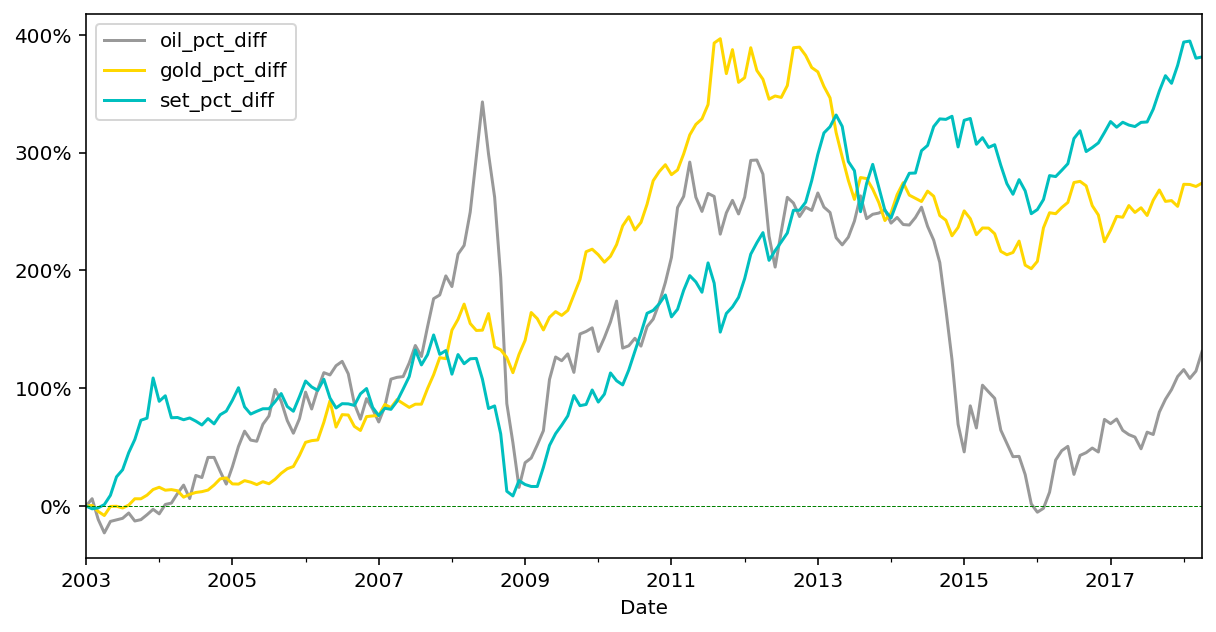

In [ ]:
cols = ['oil_pct_diff', 'gold_pct_diff', 'set_pct_diff']
color = ['.6', 'gold', 'c']

ax = df.loc[base_date:, cols].plot(kind='line', color=color, figsize=(10,5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:.0f}%".format(v*100)))
ax.axhline(0, color='g', linestyle='--', linewidth=.5);

# Set option

In [ ]:
df = pd.read_excel('https://github.com/prasertcbs/basic-dataset/raw/master/intl_tourism_receipts_usd_wdi.xlsx', sheet_name='Data', skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,554000000.0,666000000.0,726000000.0,786000000.0,782000000.0,850000000.0,...,1.352000e+09,1.223000e+09,1.254000e+09,1.358000e+09,1.412000e+09,1.506000e+09,1.625000e+09,1.659000e+09,1.638000e+09,NaN
1,Afghanistan,AFG,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.700000e+07,9.000000e+07,1.690000e+08,1.520000e+08,1.770000e+08,1.910000e+08,9.200000e+07,8.800000e+07,5.100000e+07,NaN
2,Angola,AGO,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,27000000.0,38000000.0,24000000.0,39000000.0,31000000.0,34000000.0,...,2.930000e+08,5.540000e+08,7.260000e+08,6.530000e+08,7.110000e+08,1.241000e+09,1.597000e+09,1.171000e+09,6.280000e+08,NaN
3,Albania,ALB,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,70000000.0,94000000.0,34000000.0,60000000.0,218000000.0,398000000.0,...,1.848000e+09,2.014000e+09,1.780000e+09,1.833000e+09,1.623000e+09,1.670000e+09,1.849000e+09,1.614000e+09,1.821000e+09,NaN
4,Andorra,AND,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pd.set_option('display.max_rows', 10) # display head 5 rows, tail 5 rows (Jupiter Notebook)
# pd.reset_option('display.max_rows')
# pd.set_option('display.max_columns') # display all columns
# pd.set_option('display.float_format', '{:,.0f}'.format) # display number format
# pd.reset_option('display.float_format')
# pd.set_option('display.max_columns', 100, 'display.float_format', '{:,.0f}'.format) # set multiple option

# Missing Values

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [ ]:
df.shape

(83, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [ ]:
df.dropna(inplace=True)
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [ ]:
df_clean = df.dropna() # drop rows (axis=0)
df_clean.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420


In [ ]:
df_2 = df.dropna(axis=1) # drop columns
df_2.head()

,name,genus,order,sleep_total,awake,bodywt
0,Cheetah,Acinonyx,Carnivora,12.1,11.9,50.000
1,Owl monkey,Aotus,Primates,17.0,7.0,0.480
2,Mountain beaver,Aplodontia,Rodentia,14.4,9.6,1.350
3,Greater short-tailed shrew,Blarina,Soricomorpha,14.9,9.1,0.019
4,Cow,Bos,Artiodactyla,4.0,20.0,600.000


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         83 non-null     object 
 1   genus        83 non-null     object 
 2   order        83 non-null     object 
 3   sleep_total  83 non-null     float64
 4   awake        83 non-null     float64
 5   bodywt       83 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.0+ KB


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/qnaire_missing_values.csv', index_col='obs')
df.head()

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0


In [ ]:
df.shape

(15, 12)

In [ ]:
df.dropna(thresh=10) # non-null values at least 10 columns/row (allowed null values at most 2 columns/row)

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0


In [ ]:
df.dropna(thresh=8, subset=['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8',
       'eq9', 'eq10']) # non-null values at least 8 columns/row (specify range ['eq1':'eq10'])

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


In [ ]:
df.columns.str.contains('eq')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
df.columns[df.columns.str.contains('eq')]

Index(['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10'], dtype='object')

In [ ]:
df.dropna(thresh=10, subset=df.columns[df.columns.str.contains('eq')]) # all values in range ['eq1':'eq10'] must not be null-value!

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0
13,F,NaN,4.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0


In [ ]:
df_clean = df.dropna(thresh=10, subset=df.columns[df.columns.str.contains('eq')])
df_clean.mean()

age     28.333333
eq1      2.833333
eq2      4.000000
eq3      2.666667
eq4      3.166667
eq5      2.500000
eq6      3.000000
eq7      3.000000
eq8      3.666667
eq9      3.500000
eq10     2.333333
dtype: float64

# Fill missing values

In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/qnaire_fill_missing.tsv', index_col='obs', parse_dates=['dob'])
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [ ]:
df.shape

(10, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     8 non-null      float64       
 3   own_house  9 non-null      object        
 4   own_car    8 non-null      object        
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.0+ KB


In [ ]:
df.isnull().sum()

gender       3
dob          2
salary       2
own_house    1
own_car      2
csi1         2
csi2         4
csi3         4
csi4         3
q1           2
q2           2
q3           0
dtype: int64

In [ ]:
df.describe()

,salary,csi1,csi2,csi3,csi4,q1,q2,q3
count,8.000000,8.000000,6.000000,6.000000,7.000000,8.000000,8.000000,10.000000
mean,122612.500000,3.000000,3.500000,3.166667,2.428571,2.250000,2.875000,3.700000
std,86579.978509,1.690309,1.974842,1.471960,0.786796,1.035098,1.125992,1.159502
min,32800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,61400.000000,1.750000,1.750000,2.250000,2.000000,1.750000,2.000000,3.000000
50%,100500.000000,3.000000,4.500000,3.500000,3.000000,2.000000,3.000000,4.000000
75%,161900.000000,4.250000,5.000000,4.000000,3.000000,3.000000,4.000000,4.750000
max,272500.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000


In [ ]:
df['salary'].fillna(df['salary'].median(), inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [ ]:
df['own_car'].value_counts()

False    7
True     1
Name: own_car, dtype: int64

In [ ]:
df['own_car'].fillna(False, inplace=True) # most of data of 'own car' is False, thus fillna with False
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [ ]:
df.fillna(df.mean()['csi1':'q3'], inplace=True) # replace NA with mean in each column
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


In [ ]:
df['dob'].fillna(pd.to_datetime('1995-04-13'), inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


In [ ]:
df['gender'].fillna('missing', inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,missing,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


# Crosstab

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
pd.crosstab(df['drv'], df['class'])

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [ ]:
pd.crosstab(df['drv'], df['class'], margins=True)

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0,12,3,0,33,4,51,103
f,0,35,38,11,0,22,0,106
r,5,0,0,0,0,9,11,25
All,5,47,41,11,33,35,62,234


In [ ]:
pd.crosstab(df['drv'], df['class'], margins=True, normalize='all')

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0.000000,0.051282,0.012821,0.000000,0.141026,0.017094,0.217949,0.440171
f,0.000000,0.149573,0.162393,0.047009,0.000000,0.094017,0.000000,0.452991
r,0.021368,0.000000,0.000000,0.000000,0.000000,0.038462,0.047009,0.106838
All,0.021368,0.200855,0.175214,0.047009,0.141026,0.149573,0.264957,1.000000


In [ ]:
pd.crosstab(df['drv'], df['class'], margins=True, normalize='all')*100

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0.000000,5.128205,1.282051,0.000000,14.102564,1.709402,21.794872,44.017094
f,0.000000,14.957265,16.239316,4.700855,0.000000,9.401709,0.000000,45.299145
r,2.136752,0.000000,0.000000,0.000000,0.000000,3.846154,4.700855,10.683761
All,2.136752,20.085470,17.521368,4.700855,14.102564,14.957265,26.495726,100.000000


In [ ]:
(pd.crosstab(df['drv'], df['class'], margins=True, normalize='all')*100).round(1)

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0.0,5.1,1.3,0.0,14.1,1.7,21.8,44.0
f,0.0,15.0,16.2,4.7,0.0,9.4,0.0,45.3
r,2.1,0.0,0.0,0.0,0.0,3.8,4.7,10.7
All,2.1,20.1,17.5,4.7,14.1,15.0,26.5,100.0


In [ ]:
df['trans_am'] = df['trans'].str[0]
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,a
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,m
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,m
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,a


In [ ]:
pd.crosstab(df['trans_am'], df['manufacturer'])

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
trans_am,,,,,,,,,,,,,,,
a,11,16,30,17,4,7,8,4,3,4,8,5,7,20,13
m,7,3,7,8,5,7,0,0,0,0,5,0,7,14,14


In [ ]:
pd.crosstab([df['class'], df['trans_am']], df['manufacturer'], margins=True)

manufacturer         audi  chevrolet  dodge  ford  honda  hyundai  jeep  \
class      trans_am                                                       
2seater    a            0          2      0     0      0        0     0   
           m            0          3      0     0      0        0     0   
compact    a            8          0      0     0      0        0     0   
           m            7          0      0     0      0        0     0   
midsize    a            3          5      0     0      0        4     0   
           m            0          0      0     0      0        3     0   
minivan    a            0          0     11     0      0        0     0   
pickup     a            0          0     12     5      0        0     0   
           m            0          0      7     2      0        0     0   
subcompact a            0          0      0     4      4        3     0   
           m            0          0      0     5      5        4     0   
suv        a            0          9      7     8      0        0     8   
           m            0          0      0     1      0        0     0   
All                    18         19     37    25      9       14     8   

manufacturer         land rover  lincoln  mercury  nissan  pontiac  subaru  \
class      trans_am                                                          
2seater    a                  0        0        0       0        0       0   
           m                  0        0        0       0        0       0   
compact    a                  0        0        0       1        0       2   
           m                  0        0        0       1        0       2   
midsize    a                  0        0        0       4        5       0   
           m                  0        0        0       3        0       0   
minivan    a                  0        0        0       0        0       0   
pickup     a                  0        0        0       0        0       0   
           m                  0        0        0       0        0       0   
subcompact a                  0        0        0       0        0       2   
           m                  0        0        0       0        0       2   
suv        a                  4        3        4       3        0       3   
           m                  0        0        0       1        0       3   
All                           4        3        4      13        5      14   

manufacturer         toyota  volkswagen  All  
class      trans_am                           
2seater    a              0           0    2  
           m              0           0    3  
compact    a              7           6   24  
           m              5           8   23  
midsize    a              4           4   29  
           m              3           3   12  
minivan    a              0           0   11  
pickup     a              3           0   20  
           m              4           0   13  
subcompact a              0           3   16  
           m              0           3   19  
suv        a              6           0   55  
           m              2           0    7  
All                      34          27  234

In [ ]:
pd.crosstab([df['class'], df['trans_am']], df['manufacturer'], margins=True, values=df['cty'], aggfunc=np.average)

manufacturer              audi  chevrolet      dodge    ford      honda  \
class      trans_am                                                       
2seater    a               NaN  15.000000        NaN     NaN        NaN   
           m               NaN  15.666667        NaN     NaN        NaN   
compact    a         17.500000        NaN        NaN     NaN        NaN   
           m         18.428571        NaN        NaN     NaN        NaN   
midsize    a         16.000000  18.800000        NaN     NaN        NaN   
           m               NaN        NaN        NaN     NaN        NaN   
minivan    a               NaN        NaN  15.818182     NaN        NaN   
pickup     a               NaN        NaN  12.083333  12.800        NaN   
           m               NaN        NaN  12.000000  13.500        NaN   
subcompact a               NaN        NaN        NaN  16.000  24.250000   
           m               NaN        NaN        NaN  15.800  24.600000   
suv        a               NaN  12.666667  11.857143  12.625        NaN   
           m               NaN        NaN        NaN  15.000        NaN   
All                  17.611111  15.000000  13.135135  14.000  24.444444   

manufacturer           hyundai  jeep  land rover    lincoln  mercury  \
class      trans_am                                                    
2seater    a               NaN   NaN         NaN        NaN      NaN   
           m               NaN   NaN         NaN        NaN      NaN   
compact    a               NaN   NaN         NaN        NaN      NaN   
           m               NaN   NaN         NaN        NaN      NaN   
midsize    a         19.000000   NaN         NaN        NaN      NaN   
           m         19.000000   NaN         NaN        NaN      NaN   
minivan    a               NaN   NaN         NaN        NaN      NaN   
pickup     a               NaN   NaN         NaN        NaN      NaN   
           m               NaN   NaN         NaN        NaN      NaN   
subcompact a         18.666667   NaN         NaN        NaN      NaN   
           m         18.000000   NaN         NaN        NaN      NaN   
suv        a               NaN  13.5        11.5  11.333333    13.25   
           m               NaN   NaN         NaN        NaN      NaN   
All                  18.642857  13.5        11.5  11.333333    13.25   

manufacturer            nissan  pontiac     subaru     toyota  volkswagen  \
class      trans_am                                                         
2seater    a               NaN      NaN        NaN        NaN         NaN   
           m               NaN      NaN        NaN        NaN         NaN   
compact    a         19.000000      NaN  20.000000  21.857143   19.833333   
           m         21.000000      NaN  19.500000  22.800000   21.500000   
midsize    a         19.750000     17.0        NaN  19.750000   17.500000   
           m         20.333333      NaN        NaN  20.000000   20.000000   
minivan    a               NaN      NaN        NaN        NaN         NaN   
pickup     a               NaN      NaN        NaN  15.666667         NaN   
           m               NaN      NaN        NaN  15.500000         NaN   
subcompact a               NaN      NaN  20.000000        NaN   22.666667   
           m               NaN      NaN  19.000000        NaN   25.333333   
suv        a         13.333333      NaN  18.666667  14.166667         NaN   
           m         15.000000      NaN  19.000000  15.000000         NaN   
All                  18.076923     17.0  19.285714  18.529412   20.925926   

manufacturer               All  
class      trans_am             
2seater    a         15.000000  
           m         15.666667  
compact    a         19.625000  
           m         20.652174  
midsize    a         18.310345  
           m         19.833333  
minivan    a         15.818182  
pickup     a         12.800000  
           m         13.307692  
subcompact a         20.312500  
           m     

In [ ]:
pd.crosstab([df['class'], df['trans_am']], df['manufacturer'], margins=True, values=df['cty'], aggfunc=np.average).loc[['compact', 'minivan']]
# pd.crosstab([df['class'], df['trans_am']], df['manufacturer'], margins=True, values=df['cty'], aggfunc=np.average).sort_index().loc[['compact', 'minivan']]

manufacturer           audi  chevrolet      dodge  ford  honda  hyundai  jeep  \
class   trans_am                                                                
compact a         17.500000        NaN        NaN   NaN    NaN      NaN   NaN   
        m         18.428571        NaN        NaN   NaN    NaN      NaN   NaN   
minivan a               NaN        NaN  15.818182   NaN    NaN      NaN   NaN   

manufacturer      land rover  lincoln  mercury  nissan  pontiac  subaru  \
class   trans_am                                                          
compact a                NaN      NaN      NaN    19.0      NaN    20.0   
        m                NaN      NaN      NaN    21.0      NaN    19.5   
minivan a                NaN      NaN      NaN     NaN      NaN     NaN   

manufacturer         toyota  volkswagen        All  
class   trans_am                                    
compact a         21.857143   19.833333  19.625000  
        m         22.800000   21.500000  20.652174  
minivan a               NaN         NaN  15.818182

In [ ]:
pd.crosstab([df['class'], df['trans_am']], df['manufacturer'], margins=True, values=df['cty'], aggfunc=np.max).loc[['compact', 'minivan']]

manufacturer      audi  chevrolet  dodge  ford  honda  hyundai  jeep  \
class   trans_am                                                       
compact a         21.0        NaN    NaN   NaN    NaN      NaN   NaN   
        m         21.0        NaN    NaN   NaN    NaN      NaN   NaN   
minivan a          NaN        NaN   18.0   NaN    NaN      NaN   NaN   

manufacturer      land rover  lincoln  mercury  nissan  pontiac  subaru  \
class   trans_am                                                          
compact a                NaN      NaN      NaN    19.0      NaN    20.0   
        m                NaN      NaN      NaN    21.0      NaN    20.0   
minivan a                NaN      NaN      NaN     NaN      NaN     NaN   

manufacturer      toyota  volkswagen  All  
class   trans_am                           
compact a           26.0        22.0   26  
        m           28.0        33.0   33  
minivan a            NaN         NaN   18

# Pivot Table

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/long2.csv')
df.head()

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480


In [ ]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc='sum', margins=True, margins_name='Grand Total')

menu,espresso,latte,mocha,Grand Total
branch,,,,
Bangkok,785,805,1105,2695
Pattaya,965,1260,630,2855
Phuket,900,1245,610,2755
Tak,690,870,1020,2580
Grand Total,3340,4180,3365,10885


In [ ]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc=[np.sum, np.mean], margins=True, margins_name='Grand Total').round(1)

sum                             mean                \
menu        espresso latte mocha Grand Total espresso  latte  mocha   
branch                                                                
Bangkok          785   805  1105        2695    261.7  268.3  368.3   
Pattaya          965  1260   630        2855    321.7  420.0  210.0   
Phuket           900  1245   610        2755    300.0  415.0  203.3   
Tak              690   870  1020        2580    230.0  290.0  340.0   
Grand Total     3340  4180  3365       10885    278.3  348.3  280.4   

                         
menu        Grand Total  
branch                   
Bangkok           299.4  
Pattaya           317.2  
Phuket            306.1  
Tak               286.7  
Grand Total       302.4

In [ ]:
df2 = df.pivot_table(index=['branch', 'period'], columns='menu', values='units', margins=True, margins_name='Grand Total').round(2)
df2

menu                espresso   latte   mocha  Grand Total
branch      period                                       
Bangkok     2015      455.00  390.00  215.00       353.33
            2016      140.00  115.00  480.00       245.00
            2017      190.00  300.00  410.00       300.00
Pattaya     2015      355.00  400.00  265.00       340.00
            2016      250.00  435.00  225.00       303.33
            2017      360.00  425.00  140.00       308.33
Phuket      2015      490.00  475.00  280.00       415.00
            2016       30.00  450.00  155.00       211.67
            2017      380.00  320.00  175.00       291.67
Tak         2015      320.00  340.00  355.00       338.33
            2016      235.00  365.00  425.00       341.67
            2017      135.00  165.00  240.00       180.00
Grand Total           278.33  348.33  280.42       302.36

In [ ]:
df2.groupby('branch').describe()

menu        espresso                                                          \
               count        mean         std     min     25%     50%     75%   
branch                                                                         
Bangkok          3.0  261.666667  169.287724  140.00  165.00  190.00  322.50   
Grand Total      1.0  278.330000         NaN  278.33  278.33  278.33  278.33   
Pattaya          3.0  321.666667   62.115484  250.00  302.50  355.00  357.50   
Phuket           3.0  300.000000  240.208243   30.00  205.00  380.00  435.00   
Tak              3.0  230.000000   92.601296  135.00  185.00  235.00  277.50   

menu                latte              ...   mocha         Grand Total  \
                max count        mean  ...     75%     max       count   
branch                                 ...                               
Bangkok      455.00   3.0  268.333333  ...  445.00  480.00         3.0   
Grand Total  278.33   1.0  348.330000  ...  280.42  280.42         1.0   
Pattaya      360.00   3.0  420.000000  ...  245.00  265.00         3.0   
Phuket       490.00   3.0  415.000000  ...  227.50  280.00         3.0   
Tak          320.00   3.0  290.000000  ...  390.00  425.00         3.0   

menu                                                                           
                   mean         std     min      25%     50%      75%     max  
branch                                                                         
Bangkok      299.443333   54.167145  245.00  272.500  300.00  326.665  353.33  
Grand Total  302.360000         NaN  302.36  302.360  302.36  302.360  302.36  
Pattaya      317.220000   19.885832  303.33  305.830  308.33  324.165  340.00  
Phuket       306.113333  102.431585  211.67  251.670  291.67  353.335  415.00  
Tak          286.666667   92.391137  180.00  259.165  338.33  340.000  341.67  

[5 rows x 32 columns]

In [ ]:
df3 = df.pivot_table(index=['branch'], columns=['menu', 'period'], values='units', margins=True, margins_name='Grand Total').round(2)
df3

menu        espresso                   latte                  mocha          \
period          2015    2016    2017    2015    2016   2017    2015    2016   
branch                                                                        
Bangkok          455  140.00  190.00  390.00  115.00  300.0  215.00  480.00   
Pattaya          355  250.00  360.00  400.00  435.00  425.0  265.00  225.00   
Phuket           490   30.00  380.00  475.00  450.00  320.0  280.00  155.00   
Tak              320  235.00  135.00  340.00  365.00  165.0  355.00  425.00   
Grand Total      405  163.75  266.25  401.25  341.25  302.5  278.75  321.25   

menu                Grand Total  
period         2017              
branch                           
Bangkok      410.00      299.44  
Pattaya      140.00      317.22  
Phuket       175.00      306.11  
Tak          240.00      286.67  
Grand Total  241.25      302.36

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/wide.csv') # wide format
df.head()

,branch,mocha,latte,espresso
0,Bangkok,365,160,435
1,Phuket,70,330,245
2,Pattaya,350,305,160
3,Tak,450,85,80


In [ ]:
df.describe()

,mocha,latte,espresso
count,4.000000,4.000000,4.000000
mean,308.750000,220.000000,230.000000
std,165.145138,117.118174,152.370163
min,70.000000,85.000000,80.000000
25%,280.000000,141.250000,140.000000
50%,357.500000,232.500000,202.500000
75%,386.250000,311.250000,292.500000
max,450.000000,330.000000,435.000000


In [ ]:
df.corr()

,mocha,latte,espresso
mocha,1.000000,-0.778981,-0.213606
latte,-0.778981,1.000000,0.068178
espresso,-0.213606,0.068178,1.000000


In [ ]:
df2 = pd.melt(df, id_vars='branch', var_name='menu', value_name='units') # long format
df2.head()

,branch,menu,units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160


In [ ]:
df2.describe()

,units
count,12.000000
mean,252.916667
std,138.669954
min,70.000000
25%,141.250000
50%,275.000000
75%,353.750000
max,450.000000


In [ ]:
df2.groupby('branch').describe().T

branch          Bangkok     Pattaya      Phuket         Tak
units count    3.000000    3.000000    3.000000    3.000000
      mean   320.000000  271.666667  215.000000  205.000000
      std    142.916059   99.289140  132.570736  212.190952
      min    160.000000  160.000000   70.000000   80.000000
      25%    262.500000  232.500000  157.500000   82.500000
      50%    365.000000  305.000000  245.000000   85.000000
      75%    400.000000  327.500000  287.500000  267.500000
      max    435.000000  350.000000  330.000000  450.000000

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/long2.csv')
df.head()

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480


# Axis index columns

In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/score_a.tsv', index_col='studentid', nrows=5)
df.head()

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9
C211,6,10,8,10,6,7,6,5,10
C305,8,5,4,6,3,7,10,10,5
B344,4,8,7,6,8,7,4,10,8
A312,9,8,10,8,6,9,5,10,9


In [ ]:
df.sum() # default axis = 0
# df.sum(axis='index')

math1    37
eng1     40
sci1     33
math2    37
eng2     28
sci2     36
math3    32
eng3     41
sci3     41
dtype: int64

In [ ]:
df.sum(axis=1)
# df.sum(axis='columns')

studentid
C215    63
C211    68
C305    58
B344    62
A312    74
dtype: int64

In [ ]:
df.columns

Index(['math1', 'eng1', 'sci1', 'math2', 'eng2', 'sci2', 'math3', 'eng3',
       'sci3'],
      dtype='object')

In [ ]:
df[['math1', 'math2', 'math3']].mean()

math1    7.4
math2    7.4
math3    6.4
dtype: float64

In [ ]:
df[['math1', 'math2', 'math3']].mean(axis=1)

studentid
C215    8.000000
C211    7.333333
C305    8.000000
B344    4.666667
A312    7.333333
dtype: float64

In [ ]:
import random
random.choices(['M', 'F'], k=len(df))

['F', 'F', 'F', 'F', 'F']

In [ ]:
df['gender'] = random.choices(['M', 'F'], k=len(df))
df.head()

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3,gender
studentid,,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9,F
C211,6,10,8,10,6,7,6,5,10,F
C305,8,5,4,6,3,7,10,10,5,F
B344,4,8,7,6,8,7,4,10,8,F
A312,9,8,10,8,6,9,5,10,9,F


In [ ]:
df.mean() # 'gender' is excepted to calculate

math1    7.4
eng1     8.0
sci1     6.6
math2    7.4
eng2     5.6
sci2     7.2
math3    6.4
eng3     8.2
sci3     8.2
dtype: float64

In [ ]:
df.mean(axis=1) # 'gender' is excepted to calculate

studentid
C215    7.000000
C211    7.555556
C305    6.444444
B344    6.888889
A312    8.222222
dtype: float64

In [ ]:
df.count() # 'gender' is inclusive

math1     5
eng1      5
sci1      5
math2     5
eng2      5
sci2      5
math3     5
eng3      5
sci3      5
gender    5
dtype: int64

In [ ]:
df.count(axis=1) # 'gender' is inclusive

studentid
C215    10
C211    10
C305    10
B344    10
A312    10
dtype: int64

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df = df.sample(10, random_state=15)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
184,toyota,camry,3.0,1999,6,manual(m5),f,18,26,r,midsize
36,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
30,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4,11,15,r,suv
55,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
180,toyota,camry,2.2,1999,4,auto(l4),f,21,27,r,midsize


In [ ]:
df[['cty', 'hwy']].mean()

cty    15.2
hwy    20.6
dtype: float64

In [ ]:
df['manufacturer'] + ' ' + df['model']

184                    toyota camry
36                 chevrolet malibu
178              toyota 4runner 4wd
176              toyota 4runner 4wd
30        chevrolet k1500 tahoe 4wd
55          dodge dakota pickup 4wd
127         jeep grand cherokee 4wd
202        toyota toyota tacoma 4wd
20     chevrolet c1500 suburban 2wd
180                    toyota camry
dtype: object

In [ ]:
df.apply(lambda r: f'{r.manufacturer} {r.model}: {r.cty}/{r.hwy} mpg', axis=1) # Don't forget input axis=1 always!!!

184                    toyota camry: 18/26 mpg
36                 chevrolet malibu: 17/26 mpg
178              toyota 4runner 4wd: 14/17 mpg
176              toyota 4runner 4wd: 15/17 mpg
30        chevrolet k1500 tahoe 4wd: 11/15 mpg
55          dodge dakota pickup 4wd: 11/17 mpg
127         jeep grand cherokee 4wd: 14/19 mpg
202        toyota toyota tacoma 4wd: 17/22 mpg
20     chevrolet c1500 suburban 2wd: 14/20 mpg
180                    toyota camry: 21/27 mpg
dtype: object

# Frequency distribution table

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count')

drv,4,f,r
class,,,
2seater,NaN,NaN,5.0
compact,12.0,35.0,NaN
midsize,3.0,38.0,NaN
minivan,NaN,11.0,NaN
pickup,33.0,NaN,NaN
subcompact,4.0,22.0,9.0
suv,51.0,NaN,11.0


In [ ]:
df.pivot_table(index='class', columns='drv', values='model', aggfunc='count', fill_value=0, margins=True, margins_name='Grand Total').astype('int')

drv,4,f,r,Grand Total
class,,,,
2seater,0,0,5,5
compact,12,35,0,47
midsize,3,38,0,41
minivan,0,11,0,11
pickup,33,0,0,33
subcompact,4,22,9,35
suv,51,0,11,62
Grand Total,103,106,25,234


In [ ]:
df.pivot_table(index='class', columns='drv', values=['cty', 'hwy'], fill_value=0, margins=True, margins_name='Grand Total').round(2)

cty                              hwy                          
drv              4      f      r Grand Total      4      f      r Grand Total
class                                                                        
2seater       0.00   0.00  15.40       15.40   0.00   0.00  24.80       24.80
compact      18.00  20.86   0.00       20.13  25.83  29.14   0.00       28.30
midsize      16.00  18.97   0.00       18.76  24.00  27.55   0.00       27.29
minivan       0.00  15.82   0.00       15.82   0.00  22.36   0.00       22.36
pickup       13.00   0.00   0.00       13.00  16.88   0.00   0.00       16.88
subcompact   19.50  22.36  15.89       20.37  26.00  30.55  23.22       28.14
suv          13.82   0.00  12.00       13.50  18.27   0.00  17.45       18.13
Grand Total  14.33  19.97  14.08       16.86  19.17  28.16  21.00       23.44

# Groupby

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.groupby('class').describe().T

class            2seater      compact      midsize      minivan       pickup  \
displ count     5.000000    47.000000    41.000000    11.000000    33.000000   
      mean      6.160000     2.325532     2.921951     3.390909     4.418182   
      std       0.531977     0.452274     0.718510     0.452669     0.828574   
      min       5.700000     1.800000     1.800000     2.400000     2.700000   
      25%       5.700000     2.000000     2.400000     3.300000     3.900000   
      50%       6.200000     2.200000     2.800000     3.300000     4.700000   
      75%       6.200000     2.800000     3.500000     3.800000     4.700000   
      max       7.000000     3.300000     5.300000     4.000000     5.900000   
year  count     5.000000    47.000000    41.000000    11.000000    33.000000   
      mean   2004.400000  2003.212766  2003.609756  2003.090909  2003.636364   
      std       4.929503     4.539374     4.554547     4.700097     4.567673   
      min    1999.000000  1999.000000  1999.000000  1999.000000  1999.000000   
      25%    1999.000000  1999.000000  1999.000000  1999.000000  1999.000000   
      50%    2008.000000  1999.000000  2008.000000  1999.000000  2008.000000   
      75%    2008.000000  2008.000000  2008.000000  2008.000000  2008.000000   
      max    2008.000000  2008.000000  2008.000000  2008.000000  2008.000000   
cyl   count     5.000000    47.000000    41.000000    11.000000    33.000000   
      mean      8.000000     4.595745     5.317073     5.818182     7.030303   
      std       0.000000     0.900714     1.149761     0.603023     1.334280   
      min       8.000000     4.000000     4.000000     4.000000     4.000000   
      25%       8.000000     4.000000     4.000000     6.000000     6.000000   
      50%       8.000000     4.000000     6.000000     6.000000     8.000000   
      75%       8.000000     6.000000     6.000000     6.000000     8.000000   
      max       8.000000     6.000000     8.000000     6.000000     8.000000   
cty   count     5.000000    47.000000    41.000000    11.000000    33.000000   
      mean     15.400000    20.127660    18.756098    15.818182    13.000000   
      std       0.547723     3.385500     1.946542     1.834022     2.046338   
      min      15.000000    15.000000    15.000000    11.000000     9.000000   
      25%      15.000000    18.000000    18.000000    15.500000    11.000000   
      50%      15.000000    20.000000    18.000000    16.000000    13.000000   
      75%      16.000000    21.000000    21.000000    17.000000    14.000000   
      max      16.000000    33.000000    23.000000    18.000000    17.000000   
hwy   count     5.000000    47.000000    41.000000    11.000000    33.000000   
      mean     24.800000    28.297872    27.292683    22.363636    16.878788   
      std       1.303840     3.781620     2.135930     2.062655     2.274280   
      min      23.000000    23.000000    23.000000    17.000000    12.000000   
      25%      24.000000    26.000000    26.000000    22.000000    16.000000   
      50%      25.000000    27.000000    27.000000    23.000000    17.000000   
      75%      26.000000    29.000000    29.000000    24.000000    18.000000   
      max      26.000000    44.000000    32.000000    24.000000    22.000000   

class         subcompact          suv  
displ count    35.000000    62.000000  
      mean      2.660000     4.456452  
      std       1.102457     1.065805  
      min       1.600000     2.500000  
      25%       1.900000     4.000000  
      50%       2.200000     4.650000  
      75%       3.250000     5.300000  
      max       5.400000     6.500000  
year  count    35.000000    62.000000  
      mean   2003.114286  2003.790323  
      std       4.548894     4.527284  
      min    1999.000000  1999.000000  
      25%    1999.000000  1999.000000  
      50%    1999.000000  2008.000000  
      75%    2008.000000  2008.000000  
      max    2008.000000  2008.000000  
cyl   count    35.000000    62.000000  

In [ ]:
g = df.groupby('class')
g

In [ ]:
g.groups # data is contained in dictionary

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [ ]:
for k, v in g:
    print(k)
    print(v)

2seater
   manufacturer     model  displ  year  cyl       trans drv  cty  hwy fl  \
23    chevrolet  corvette    5.7  1999    8  manual(m6)   r   16   26  p   
24    chevrolet  corvette    5.7  1999    8    auto(l4)   r   15   23  p   
25    chevrolet  corvette    6.2  2008    8  manual(m6)   r   16   26  p   
26    chevrolet  corvette    6.2  2008    8    auto(s6)   r   15   25  p   
27    chevrolet  corvette    7.0  2008    8  manual(m6)   r   15   24  p   

      class  
23  2seater  
24  2seater  
25  2seater  
26  2seater  
27  2seater  
compact
    manufacturer         model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi            a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi            a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi            a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi            a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi            a4    2.8 

In [ ]:
g.get_group('minivan')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
38,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
39,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
44,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan
46,dodge,caravan 2wd,3.8,2008,6,auto(l6),f,16,23,r,minivan


In [ ]:
g.mean()

,displ,year,cyl,cty,hwy
class,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857
suv,4.456452,2003.790323,6.967742,13.500000,18.129032


In [ ]:
df.groupby('manufacturer').describe() # too much columns!

displ                                                       year  \
             count      mean           std  min    25%  50%    75%  max count   
manufacturer                                                                    
audi          18.0  2.544444  6.732032e-01  1.8  2.000  2.8  3.025  4.2  18.0   
chevrolet     19.0  5.063158  1.370406e+00  2.4  4.450  5.3  5.850  7.0  19.0   
dodge         37.0  4.378378  8.679910e-01  2.4  3.800  4.7  4.700  5.9  37.0   
ford          25.0  4.536000  5.407402e-01  3.8  4.000  4.6  4.600  5.4  25.0   
honda          9.0  1.711111  1.452966e-01  1.6  1.600  1.6  1.800  2.0   9.0   
hyundai       14.0  2.428571  3.646464e-01  2.0  2.100  2.4  2.650  3.3  14.0   
jeep           8.0  4.575000  1.015241e+00  3.0  3.925  4.7  4.950  6.1   8.0   
land rover     4.0  4.300000  2.581989e-01  4.0  4.150  4.3  4.450  4.6   4.0   
lincoln        3.0  5.400000  1.087792e-15  5.4  5.400  5.4  5.400  5.4   3.0   
mercury        4.0  4.400000  4.898979e-01  4.0  4.000  4.3  4.700  5.0   4.0   
nissan        13.0  3.269231  8.644696e-01  2.4  2.500  3.3  3.500  5.6  13.0   
pontiac        5.0  3.960000  8.080842e-01  3.1  3.800  3.8  3.800  5.3   5.0   
subaru        14.0  2.457143  1.089410e-01  2.2  2.500  2.5  2.500  2.5  14.0   
toyota        34.0  2.952941  9.313513e-01  1.8  2.250  2.7  3.400  5.7  34.0   
volkswagen    27.0  2.255556  4.431820e-01  1.8  2.000  2.0  2.500  3.6  27.0   

                           ...    cty         hwy                             \
                     mean  ...    75%   max count       mean       std   min   
manufacturer               ...                                                 
audi          2003.500000  ...  18.75  21.0  18.0  26.444444  2.175322  23.0   
chevrolet     2004.684211  ...  16.50  22.0  19.0  21.894737  5.108759  14.0   
dodge         2004.108108  ...  15.00  18.0  37.0  17.945946  3.574182  12.0   
ford          2002.600000  ...  15.00  18.0  25.0  19.360000  3.327662  15.0   
honda         2003.000000  ...  25.00  28.0   9.0  32.555556  2.554952  29.0   
hyundai       2004.142857  ...  19.75  21.0  14.0  26.857143  2.178819  24.0   
jeep          2005.750000  ...  15.00  17.0   8.0  17.625000  3.248626  12.0   
land rover    2003.500000  ...  12.00  12.0   4.0  16.500000  1.732051  15.0   
lincoln       2002.000000  ...  11.50  12.0   3.0  17.000000  1.000000  16.0   
mercury       2003.500000  ...  13.25  14.0   4.0  18.000000  1.154701  17.0   
nissan        2003.846154  ...  19.00  23.0  13.0  24.615385  5.091471  17.0   
pontiac       2002.600000  ...  18.00  18.0   5.0  26.400000  1.140175  25.0   
subaru        2004.142857  ...  20.00  21.0  14.0  25.571429  1.157868  23.0   
toyota        2002.705882  ...  21.00  28.0  34.0  24.911765  6.166221  15.0   
volkswagen    2002.666667  ...  21.00  35.0  27.0  29.222222  5.315676  23.0   

                                        
                25%   50%    75%   max  
manufacturer                            
audi          25.00  26.0  27.75  31.0  
chevrolet     17.00  23.0  26.00  30.0  
dodge         16.00  17.0  21.00  24.0  
ford          17.00  18.0  22.00  26.0  
honda         32.00  32.0  34.00  36.0  
hyundai       26.00  26.5  28.00  31.0  
jeep          16.25  18.5  19.25  22.0  
land rover    15.00  16.5  18.00  18.0  
lincoln       16.50  17.0  17.50  18.0  
mercury       17.00  18.0  19.00  19.0  
nissan        20.00  26.0  27.00  32.0  
pontiac       26.00  26.0  27.00  28.0  
subaru        25.00  26.0  26.00  27.0  
toyota        20.00  26.0  29.75  37.0  
volkswagen    26.00  29.0  29.00  44.0  

[15 rows x 40 columns]

In [ ]:
g.mean()[['cty', 'hwy']] # specify columns

,cty,hwy
class,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


In [ ]:
g2 = df.groupby(['class', 'drv'])
g2.groups # data is contained in dictionary with tuple

{('2seater', 'r'): [23, 24, 25, 26, 27], ('compact', '4'): [7, 8, 9, 10, 11, 12, 13, 14, 169, 170, 171, 172], ('compact', 'f'): [0, 1, 2, 3, 4, 5, 6, 141, 142, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], ('midsize', '4'): [15, 16, 17], ('midsize', 'f'): [32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], ('minivan', 'f'): [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], ('pickup', '4'): [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], ('subcompact', '4'): [165, 166, 167, 168], ('subcompact', 'f'): [99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 221, 222, 223, 224, 225, 226], ('subcompact', 'r'): [90, 91, 92, 93, 94, 95, 96, 97, 98], ('suv', '4'): [2

In [ ]:
g2.get_group(('midsize', '4'))

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
16,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize


In [ ]:
g2.corr()

displ          year       cyl           cty       hwy
class      drv                                                                
2seater    r   displ  1.000000  7.893580e-01       NaN -3.603591e-01 -0.122547
               year   0.789358  1.000000e+00       NaN -1.666667e-01  0.210042
               cyl         NaN           NaN       NaN           NaN       NaN
               cty   -0.360359 -1.666667e-01       NaN  1.000000e+00  0.840168
               hwy   -0.122547  2.100420e-01       NaN  8.401681e-01  1.000000
compact    4   displ  1.000000  2.396806e-01  0.798935 -3.724287e-01 -0.476429
               year   0.239681  1.000000e+00 -0.250000  5.669467e-01  0.386510
               cyl    0.798935 -2.500000e-01  1.000000 -7.559289e-01 -0.552158
               cty   -0.372429  5.669467e-01 -0.755929  1.000000e+00  0.667827
               hwy   -0.476429  3.865103e-01 -0.552158  6.678271e-01  1.000000
           f   displ  1.000000 -2.115514e-02  0.902712 -6.451803e-01 -0.588834
               year  -0.021155  1.000000e+00 -0.133870  1.699265e-01  0.221433
               cyl    0.902712 -1.338699e-01  1.000000 -6.032782e-01 -0.554920
               cty   -0.645180  1.699265e-01 -0.603278  1.000000e+00  0.951820
               hwy   -0.588834  2.214327e-01 -0.554920  9.518199e-01  1.000000
midsize    4   displ  1.000000  6.657714e-01  0.979076  2.034970e-01 -0.746156
               year   0.665771  1.000000e+00  0.500000  8.660254e-01  0.000000
               cyl    0.979076  5.000000e-01  1.000000  0.000000e+00 -0.866025
               cty    0.203497  8.660254e-01  0.000000  1.000000e+00  0.500000
               hwy   -0.746156  0.000000e+00 -0.866025  5.000000e-01  1.000000
           f   displ  1.000000  2.423939e-01  0.856574 -5.945473e-01 -0.496129
               year   0.242394  1.000000e+00 -0.048737  3.627763e-01  0.470871
               cyl    0.856574 -4.873702e-02  1.000000 -7.362217e-01 -0.715348
               cty   -0.594547  3.627763e-01 -0.736222  1.000000e+00  0.797880
               hwy   -0.496129  4.708710e-01 -0.715348  7.978797e-01  1.000000
minivan    f   displ  1.000000  3.153380e-01  0.726022 -3.515015e-01 -0.221017
               year   0.315338  1.000000e+00  0.288675 -2.183063e-01 -0.075955
               cyl    0.726022  2.886751e-01  1.000000 -3.945576e-01 -0.263117
               cty   -0.351502 -2.183063e-01 -0.394558  1.000000e+00  0.970862
               hwy   -0.221017 -7.595545e-02 -0.263117  9.708622e-01  1.000000
pickup     4   displ  1.000000  7.363771e-02  0.909667 -7.243261e-01 -0.623990
               year   0.073638  1.000000e+00  0.206966 -2.042990e-15  0.028715
               cyl    0.909667  2.069657e-01  1.000000 -7.553871e-01 -0.678430
               cty   -0.724326 -2.042990e-15 -0.755387  1.000000e+00  0.933348
               hwy   -0.623990  2.871493e-02 -0.678430  9.333478e-01  1.000000
subcompact 4   displ  1.000000           NaN       NaN -5.773503e-01       NaN
               year        NaN           NaN       NaN           NaN       NaN
               cyl         NaN           NaN       NaN           NaN       NaN
               cty   -0.577350           NaN       NaN  1.000000e+00       NaN
               hwy         NaN           NaN       NaN           NaN       NaN
           f   displ  1.000000  5.878216e-01  0.896749 -6.431082e-01 -0.563518
               year   0.587822  1.000000e+00  0.512148 -4.116935e-01 -0.300614
               cyl    0.896749  5.121475e-01  1.000000 -5.640179e-01 -0.539988
               cty   -0.643108 -4.116935e-01 -0.564018  1.000000e+00  0.946225
               hwy   -0.563518 -3.006143e-01 -0.539988  9.462254e-01  1.000000
           r   displ  1.000000  3.219375e-01  0.865207 -9.232839e-01 -0.920166
               year   0.321937  1.000000e+00  0.100000 -3.990119e-01 -0.121626
               cyl    0.865207  1.000000e-01  1.000000 -8.887084e-01 -0.887870
               cty   -0.923284 -3.990119e-01 -0.888708  1.000000e+00  0.922

In [ ]:
g2.get_group(('midsize', '4')).corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.665771,0.979076,0.203497,-0.746156
year,0.665771,1.000000,0.500000,0.866025,0.000000
cyl,0.979076,0.500000,1.000000,0.000000,-0.866025
cty,0.203497,0.866025,0.000000,1.000000,0.500000
hwy,-0.746156,0.000000,-0.866025,0.500000,1.000000


# Sort values & Sort index

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [ ]:
df.sort_values('sleep_total', ascending=False)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.10,0.00025,0.010
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.30,0.00030,0.023
36,Thick-tailed opposum,Lutreolina,carni,Didelphimorphia,lc,19.4,6.6,NaN,4.60,NaN,0.370
61,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NaN,5.90,0.08100,60.000
19,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.333333,6.00,0.00630,1.700
...,...,...,...,...,...,...,...,...,...,...,...
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NaN,20.90,0.41900,187.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.00,0.09820,14.800
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.10,0.65500,521.000
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000


In [ ]:
df.sort_values(['vore', 'sleep_total'], ascending=[True, False])

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
36,Thick-tailed opposum,Lutreolina,carni,Didelphimorphia,lc,19.4,6.6,NaN,4.6,NaN,0.370
17,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.383333,6.6,0.0108,3.500
50,Tiger,Panthera,carni,Carnivora,en,15.8,NaN,NaN,8.2,NaN,162.564
46,Northern grasshopper mouse,Onychomys,carni,Rodentia,lc,14.5,NaN,NaN,9.5,NaN,0.028
52,Lion,Panthera,carni,Carnivora,vu,13.5,NaN,NaN,10.5,NaN,161.499
...,...,...,...,...,...,...,...,...,...,...,...
56,Deer mouse,Peromyscus,NaN,Rodentia,NaN,11.5,NaN,NaN,12.5,NaN,0.021
68,Mole rat,Spalax,NaN,Rodentia,NaN,10.6,2.4,NaN,13.4,0.0030,0.122
54,Desert hedgehog,Paraechinus,NaN,Erinaceomorpha,lc,10.3,2.7,NaN,13.7,0.0024,0.550
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045


In [ ]:
df2 = df.set_index('name')
df2.head()

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [ ]:
df2.sort_index(inplace=True)
df2.head()

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.7,5.7120,6654.000
African giant pouched rat,Cricetomys,omni,Rodentia,NaN,8.3,2.0,NaN,15.7,0.0066,1.000
African striped mouse,Rhabdomys,omni,Rodentia,NaN,8.7,NaN,NaN,15.3,NaN,0.044
Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.0445,3.380
Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NaN,NaN,7.4,0.0057,0.920


In [ ]:
df3 = df.set_index(['vore', 'name'])
df3

genus         order  conservation  \
vore  name                                                                 
carni Cheetah                       Acinonyx     Carnivora            lc   
omni  Owl monkey                       Aotus      Primates           NaN   
herbi Mountain beaver             Aplodontia      Rodentia            nt   
omni  Greater short-tailed shrew     Blarina  Soricomorpha            lc   
herbi Cow                                Bos  Artiodactyla  domesticated   
...                                      ...           ...           ...   
omni  Tree shrew                      Tupaia    Scandentia           NaN   
carni Bottle-nosed dolphin          Tursiops       Cetacea           NaN   
      Genet                          Genetta     Carnivora           NaN   
      Arctic fox                      Vulpes     Carnivora           NaN   
      Red fox                         Vulpes     Carnivora           NaN   

                                  sleep_total  sleep_rem  sleep_cycle  awake  \
vore  name                                                                     
carni Cheetah                            12.1        NaN          NaN   11.9   
omni  Owl monkey                         17.0        1.8          NaN    7.0   
herbi Mountain beaver                    14.4        2.4          NaN    9.6   
omni  Greater short-tailed shrew         14.9        2.3     0.133333    9.1   
herbi Cow                                 4.0        0.7     0.666667   20.0   
...                                       ...        ...          ...    ...   
omni  Tree shrew                          8.9        2.6     0.233333   15.1   
carni Bottle-nosed dolphin                5.2        NaN          NaN   18.8   
      Genet                               6.3        1.3          NaN   17.7   
      Arctic fox                         12.5        NaN          NaN   11.5   
      Red fox                             9.8        2.4     0.350000   14.2   

                                  brainwt   bodywt  
vore  name                                          
carni Cheetah                         NaN   50.000  
omni  Owl monkey                  0.01550    0.480  
herbi Mountain beaver                 NaN    1.350  
omni  Greater short-tailed shrew  0.00029    0.019  
herbi Cow                         0.42300  600.000  
...                                   ...      ...  
omni  Tree shrew                  0.00250    0.104  
carni Bottle-nosed dolphin            NaN  173.330  
      Genet                       0.01750    2.000  
      Arctic fox                  0.04450    3.380  
      Red fox                     0.05040    4.230  

[83 rows x 9 columns]

In [ ]:
df3.sort_index()

genus          order conservation  \
vore  name                                                          
carni Arctic fox               Vulpes      Carnivora          NaN   
      Bottle-nosed dolphin   Tursiops        Cetacea          NaN   
      Caspian seal              Phoca      Carnivora           vu   
      Cheetah                Acinonyx      Carnivora           lc   
      Common porpoise        Phocoena        Cetacea           vu   
...                               ...            ...          ...   
NaN   Mole rat                 Spalax       Rodentia          NaN   
      Musk shrew               Suncus   Soricomorpha          NaN   
      Phalanger             Phalanger  Diprotodontia          NaN   
      Rock hyrax             Procavia     Hyracoidea           lc   
      Vesper mouse            Calomys       Rodentia          NaN   

                            sleep_total  sleep_rem  sleep_cycle  awake  \
vore  name                                                               
carni Arctic fox                   12.5        NaN          NaN  11.50   
      Bottle-nosed dolphin          5.2        NaN          NaN  18.80   
      Caspian seal                  3.5        0.4          NaN  20.50   
      Cheetah                      12.1        NaN          NaN  11.90   
      Common porpoise               5.6        NaN          NaN  18.45   
...                                 ...        ...          ...    ...   
NaN   Mole rat                     10.6        2.4          NaN  13.40   
      Musk shrew                   12.8        2.0     0.183333  11.20   
      Phalanger                    13.7        1.8          NaN  10.30   
      Rock hyrax                    5.4        0.5          NaN  18.60   
      Vesper mouse                  7.0        NaN          NaN  17.00   

                            brainwt   bodywt  
vore  name                                    
carni Arctic fox            0.04450    3.380  
      Bottle-nosed dolphin      NaN  173.330  
      Caspian seal              NaN   86.000  
      Cheetah                   NaN   50.000  
      Common porpoise           NaN   53.180  
...                             ...      ...  
NaN   Mole rat              0.00300    0.122  
      Musk shrew            0.00033    0.048  
      Phalanger             0.01140    1.620  
      Rock hyrax            0.02100    3.600  
      Vesper mouse              NaN    0.045  

[83 rows x 9 columns]

In [ ]:
df4 = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/score_a.tsv')
df4.head()

,studentid,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
0,C215,10,9,4,7,5,6,7,6,9
1,C211,6,10,8,10,6,7,6,5,10
2,C305,8,5,4,6,3,7,10,10,5
3,B344,4,8,7,6,8,7,4,10,8
4,A312,9,8,10,8,6,9,5,10,9


In [ ]:
df4.sort_index(axis=1) # sort by column name

,eng1,eng2,eng3,math1,math2,math3,sci1,sci2,sci3,studentid
0,9,5,6,10,7,7,4,6,9,C215
1,10,6,5,6,10,6,8,7,10,C211
2,5,3,10,8,6,10,4,7,5,C305
3,8,8,10,4,6,4,7,7,8,B344
4,8,6,10,9,8,5,10,9,9,A312
5,6,5,6,4,6,8,6,3,6,B243
6,4,7,9,4,6,7,4,4,6,B304
7,4,6,5,4,7,9,7,6,8,A349
8,4,6,9,4,8,10,4,8,6,C409
9,10,5,7,4,3,10,4,4,7,C446


In [ ]:
df5 = df4.set_index('studentid')
df5.head()

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9
C211,6,10,8,10,6,7,6,5,10
C305,8,5,4,6,3,7,10,10,5
B344,4,8,7,6,8,7,4,10,8
A312,9,8,10,8,6,9,5,10,9


In [ ]:
df5.sort_index(axis=1) # 'studentid' is not affected

,eng1,eng2,eng3,math1,math2,math3,sci1,sci2,sci3
studentid,,,,,,,,,
C215,9,5,6,10,7,7,4,6,9
C211,10,6,5,6,10,6,8,7,10
C305,5,3,10,8,6,10,4,7,5
B344,8,8,10,4,6,4,7,7,8
A312,8,6,10,9,8,5,10,9,9
B243,6,5,6,4,6,8,6,3,6
B304,4,7,9,4,6,7,4,4,6
A349,4,6,5,4,7,9,7,6,8
C409,4,6,9,4,8,10,4,8,6


# Drop duplicates

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/duplicates.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv


In [ ]:
df.drop_duplicates()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [ ]:
df.drop_duplicates(subset='manufacturer')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [ ]:
df.drop_duplicates(subset=['manufacturer', 'model'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


# Query method

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
67,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
52,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
186,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact


In [ ]:
df[df['manufacturer'] == 'audi']
# df[df['manufacturer'] != 'audi']

# df.query("manufacturer == 'audi'")
# df.query("manufacturer != 'audi'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [ ]:
df[(df['cty'] >= 20) & (df['cty'] < 25)]
# df.query("20 <= cty < 25")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
33,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact


In [ ]:
df[(df['manufacturer'] == 'toyota') & (df['cty'] > 25)]
# df[(df['manufacturer'] == 'toyota') | (df['cty'] > 25)]

# df.query("manufacturer == 'toyota' and cty > 25")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact


In [ ]:
df[df['manufacturer'].isin(['toyota', 'nissan', 'honda'])]
# df[~df['manufacturer'].isin(['toyota', 'nissan', 'honda'])]

# df[df['manufacturer'].str.contains('toyota'|'nissan'|'honda')]
# df[df['manufacturer'].str.contains('toyota'|'nissan'|'honda', case=False)] # ignore case sensitive

# df.query("manufacturer in ['toyota', 'nissan', 'honda']")
# df.query("manufacturer not in ['toyota', 'nissan', 'honda']")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
141,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact


In [ ]:
df[(df['cty'] > 20) & (df['cty'] < 30) & (df['drv'].isin(['4', 'f']))]
# df.query("20 < cty < 30 and drv in ['4', 'f']")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
33,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact


In [ ]:
df[df['manufacturer'].str.startswith('f')] # startswith does not support regex!!!
# df.query("manufacturer.str.startswith('f')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
74,ford,expedition 2wd,4.6,1999,8,auto(l4),r,11,17,r,suv
75,ford,expedition 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
76,ford,expedition 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
81,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup


In [ ]:
df[df['manufacturer'].str.match('[af]')] # starts with 'a' or 'f'
# df.query("manufacturer.str.match('[af]')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [ ]:
df[df['manufacturer'].str.match('[^adf]')] # does not starts with a, d, f

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
df[df['manufacturer'].str.match('[a-f]')] # starts from a to f (abcdef)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
94,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact
95,ford,mustang,4.6,1999,8,manual(m5),r,15,22,r,subcompact
96,ford,mustang,4.6,2008,8,manual(m5),r,15,23,r,subcompact
97,ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact


In [ ]:
df[df['model'].str.match('a\d')] # starts with a follow by number

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [ ]:
df[df['model'].str.match('\d')] # starts with number
# df[df['model'].str.match('[0-9]')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
174,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
175,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv


In [ ]:
df[df['model'].str.match('.i')] # starts with any, the second one is i

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
115,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact


# Shuffle

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/spotify-daily.csv')
df.head()

,Position,Track Name,Artist,Streams,URL
0,1,เพื่อนเล่น ไม่เล่นเพื่อน (Just Being Friendly),Tilly Birds,79928,https://open.spotify.com/track/19KNYtZF0xP7VCI...
1,2,Butter,BTS,74281,https://open.spotify.com/track/2bgTY4UwhfBYhGT...
2,3,Sunkissed,Urworld,55040,https://open.spotify.com/track/52h8p62Jx8KzQyn...
3,4,วัดปะหล่ะ? (Test Me),4EVE,51097,https://open.spotify.com/track/0gEewSHZqPiNQa9...
4,5,แปะหัวใจ (14th Feb),Jaonaay,50750,https://open.spotify.com/track/6GDI4Y8fOsptYwS...


In [ ]:
len(df)

200

In [ ]:
df.sample(frac=1) # frac = 1 mean 100% of data
# df.sample(len(df))

,Position,Track Name,Artist,Streams,URL
188,189,ร W8,Gene Kasidit,6212,https://open.spotify.com/track/3zc9UfgETcTMGia...
127,128,2 soon,keshi,7948,https://open.spotify.com/track/5SlU0Yhi51jobhE...
92,93,Boy With Luv (feat. Halsey),BTS,10676,https://open.spotify.com/track/5KawlOMHjWeUjQt...
122,123,I’d Do It Again,Violette Wautier,8181,https://open.spotify.com/track/5A8ysv0c3aUkij0...
147,148,รอยยิ้ม,SCRUBB,7153,https://open.spotify.com/track/6ezEwX2eZRZlioq...
...,...,...,...,...,...
181,182,Black Mamba,aespa,6317,https://open.spotify.com/track/1t2qYCAjUAoGfeF...
135,136,ที่ผ่านมา,YERM,7537,https://open.spotify.com/track/5UlSKEFiNHNFSye...
28,29,Alcohol-Free,TWICE,25835,https://open.spotify.com/track/6HTwoo4dUOvePNq...
152,153,Watermelon Sugar,Harry Styles,7026,https://open.spotify.com/track/6UelLqGlWMcVH1E...


In [ ]:
df = df.sample(frac=1).reset_index(drop=True) # reset index to start by 1
df.head()

,Position,Track Name,Artist,Streams,URL
0,65,Life Goes On,BTS,15410,https://open.spotify.com/track/249gnXrbfmV8NG6...
1,26,คิด(แต่ไม่)ถึง (Same Page?),Tilly Birds,27116,https://open.spotify.com/track/0JStm1Ns9Ya2zQh...
2,41,Friend Zone,Three Man Down,22381,https://open.spotify.com/track/70gE5odAgYvmx0q...
3,112,ปล่อยปาก,Atom Chanakan,8941,https://open.spotify.com/track/692Ch9apeq9cOvZ...
4,75,เก็บไว้ในใจไม่พอ,Maiyarap,13643,https://open.spotify.com/track/0hdVaCnCS5d5puP...


In [ ]:
train = df.head(int(len(df)*.3)) # select 30% of data
train

,Position,Track Name,Artist,Streams,URL
0,65,Life Goes On,BTS,15410,https://open.spotify.com/track/249gnXrbfmV8NG6...
1,26,คิด(แต่ไม่)ถึง (Same Page?),Tilly Birds,27116,https://open.spotify.com/track/0JStm1Ns9Ya2zQh...
2,41,Friend Zone,Three Man Down,22381,https://open.spotify.com/track/70gE5odAgYvmx0q...
3,112,ปล่อยปาก,Atom Chanakan,8941,https://open.spotify.com/track/692Ch9apeq9cOvZ...
4,75,เก็บไว้ในใจไม่พอ,Maiyarap,13643,https://open.spotify.com/track/0hdVaCnCS5d5puP...
5,1,เพื่อนเล่น ไม่เล่นเพื่อน (Just Being Friendly),Tilly Birds,79928,https://open.spotify.com/track/19KNYtZF0xP7VCI...
6,103,Stuck with U (with Justin Bieber),Ariana Grande,9572,https://open.spotify.com/track/4HBZA5flZLE435Q...
7,90,คนเราจะแอบรักใครสักคนได้นานแค่ไหน,Rooftop,11105,https://open.spotify.com/track/3IPtnAYykrWz9EP...
8,37,At My Worst,Pink Sweat$,23519,https://open.spotify.com/track/2MJz8BxxMsERULa...
9,3,Sunkissed,Urworld,55040,https://open.spotify.com/track/52h8p62Jx8KzQyn...


In [ ]:
test = df[-3:]
test
# test = df.tail(3)

,Position,Track Name,Artist,Streams,URL
197,117,ต้องชอบแค่ไหน,Pretzelle,8517,https://open.spotify.com/track/5MZwRe4ZpXTuhpM...
198,146,เรื่องเมื่อคืน,SOYBAD,7164,https://open.spotify.com/track/6l1DC6p0q0tGguu...
199,185,แอบหวัง,Anatomy Rabbit,6267,https://open.spotify.com/track/0LLETxISOeZVam4...


# Split-Apply-Combine

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
32,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
49,dodge,dakota pickup 4wd,3.7,2008,6,auto(l4),4,14,18,r,pickup
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.nlargest(3, 'cty')
# df.nsmallest(3, 'cty')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [ ]:
df['trans_am'] = df['trans'].str[0]
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
98,ford,mustang,5.4,2008,8,manual(m6),r,14,20,p,subcompact,m
58,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,a
180,toyota,camry,2.2,1999,4,auto(l4),f,21,27,r,midsize,a
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize,a
70,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup,a


In [ ]:
df[df['trans_am'] == 'a'].nlargest(3, 'cty')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,a
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,a
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,a


In [ ]:
g = df.groupby('trans_am')
g.groups

{'a': [0, 3, 4, 6, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 70, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 86, 87, 88, 89, 91, 93, 94, 97, 100, 103, 105, 106, 108, 110, 112, 114, 115, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, ...], 'm': [1, 2, 5, 7, 9, 12, 14, 23, 25, 27, 48, 51, 55, 64, 68, 69, 71, 78, 84, 85, 90, 92, 95, 96, 98, 99, 101, 102, 104, 107, 109, 111, 113, 116, 117, 120, 121, 141, 144, 145, 148, 151, 159, 161, 162, 166, 167, 171, 172, 173, 176, 179, 181, 184, 187, 188, 191, 195, 196, 200, 202, 203, 205, 207, 209, 211, 212, 213, 216, 218, 220, 221, 223, 225, 227, 230, 232]}

In [ ]:
g.get_group('a')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,a
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,a
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,a
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,a
...,...,...,...,...,...,...,...,...,...,...,...,...
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,a
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,a
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,a
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,a


In [ ]:
g.get_group('m')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,m
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,m
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,m
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,m
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,m
...,...,...,...,...,...,...,...,...,...,...,...,...
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,m
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,m
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,m
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,m


In [ ]:
g.apply(lambda grp: grp.nlargest(3, 'cty')) # find the most 3 values in each group (split-apply-combine)
# df.groupby('trans_am').apply(lambda grp: grp.nlargest(3, 'cty'))

manufacturer       model  displ  year  cyl       trans drv  cty  \
trans_am                                                                       
a        222   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   
         197       toyota     corolla    1.8  2008    4    auto(l4)   f   26   
         105        honda       civic    1.8  2008    4    auto(l5)   f   25   
m        221   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   
         212   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   
         99         honda       civic    1.6  1999    4  manual(m5)   f   28   

              hwy fl       class trans_am  
trans_am                                   
a        222   41  d  subcompact        a  
         197   35  r     compact        a  
         105   36  r  subcompact        a  
m        221   44  d  subcompact        m  
         212   44  d     compact        m  
         99    33  r  subcompact        m

In [ ]:
df.groupby('class').apply(lambda grp: grp.nlargest(3, 'cty')) # (split-apply-combine)

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
2seater    23     chevrolet           corvette    5.7  1999    8  manual(m6)   
           25     chevrolet           corvette    6.2  2008    8  manual(m6)   
           24     chevrolet           corvette    5.7  1999    8    auto(l4)   
compact    212   volkswagen              jetta    1.9  1999    4  manual(m5)   
           196       toyota            corolla    1.8  2008    4  manual(m5)   
           195       toyota            corolla    1.8  1999    4  manual(m5)   
midsize    143       nissan             altima    2.5  2008    4    auto(av)   
           144       nissan             altima    2.5  2008    4  manual(m6)   
           33     chevrolet             malibu    2.4  2008    4    auto(l4)   
minivan    37         dodge        caravan 2wd    2.4  1999    4    auto(l3)   
           38         dodge        caravan 2wd    3.0  1999    6    auto(l4)   
           41         dodge        caravan 2wd    3.3  2008    6    auto(l4)   
pickup     202       toyota  toyota tacoma 4wd    2.7  2008    4  manual(m5)   
           201       toyota  toyota tacoma 4wd    2.7  1999    4    auto(l4)   
           206       toyota  toyota tacoma 4wd    4.0  2008    6    auto(l5)   
subcompact 221   volkswagen         new beetle    1.9  1999    4  manual(m5)   
           222   volkswagen         new beetle    1.9  1999    4    auto(l4)   
           99         honda              civic    1.6  1999    4  manual(m5)   
suv        161       subaru       forester awd    2.5  2008    4  manual(m5)   
           163       subaru       forester awd    2.5  2008    4    auto(l4)   
           162       subaru       forester awd    2.5  2008    4  manual(m5)   

               drv  cty  hwy fl       class trans_am  
class                                                 
2seater    23    r   16   26  p     2seater        m  
           25    r   16   26  p     2seater        m  
           24    r   15   23  p     2seater        a  
compact    212   f   33   44  d     compact        m  
           196   f   28   37  r     compact        m  
           195   f   26   35  r     compact        m  
midsize    143   f   23   31  r     midsize        a  
           144   f   23   32  r     midsize        m  
           33    f   22   30  r     midsize        a  
minivan    37    f   18   24  r     minivan        a  
           38    f   17   24  r     minivan        a  
           41    f   17   24  r     minivan        a  
pickup     202   4   17   22  r      pickup        m  
           201   4   16   20  r      pickup        a  
           206   4   16   20  r      pickup        a  
subcompact 221   f   35   44  d  subcompact        m  
           222   f   29   41  d  subcompact        a  
           99    f   28   33  r  subcompact        m  
suv        161   4   20   27  r         suv        m  
           163   4   20   26  r         suv        a  
           162   4   19   25  p         suv        m

In [ ]:
df = df[df['year'] == 2008]
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,m
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,a
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,m
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,a


In [ ]:
g = df.groupby('class') # split data
g.groups

{'2seater': [25, 26, 27], 'compact': [2, 3, 6, 9, 10, 13, 14, 169, 170, 171, 172, 188, 189, 192, 196, 197, 209, 210, 215, 216, 217, 218], 'midsize': [16, 17, 33, 35, 36, 110, 111, 114, 143, 144, 145, 146, 149, 157, 158, 181, 182, 185, 229, 230, 233], 'minivan': [41, 42, 43, 46, 47], 'pickup': [48, 49, 52, 53, 54, 64, 65, 66, 67, 68, 69, 72, 87, 89, 202, 205, 206], 'subcompact': [92, 93, 96, 97, 98, 104, 105, 106, 107, 117, 118, 119, 120, 121, 225, 226], 'suv': [18, 19, 20, 22, 28, 29, 58, 59, 60, 62, 76, 80, 81, 122, 123, 126, 127, 128, 129, 131, 132, 136, 138, 139, 152, 153, 161, 162, 163, 164, 177, 178, 199]}

In [ ]:
g.groups.keys()

dict_keys(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'])

In [ ]:
g.groups['compact']

Int64Index([  2,   3,   6,   9,  10,  13,  14, 169, 170, 171, 172, 188, 189,
            192, 196, 197, 209, 210, 215, 216, 217, 218],
           dtype='int64')

In [ ]:
g.get_group('compact').head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,m
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,a
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,m
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,a


In [ ]:
for k in g.groups.keys():
    print(f"{k}: {g.get_group(k)['cty'].mean()}")

2seater: 15.333333333333334
compact: 20.545454545454547
midsize: 19.333333333333332
minivan: 15.4
pickup: 13.0
subcompact: 18.9375
suv: 13.606060606060606


In [ ]:
g['cty'].mean() # split by 'class' -> apply by mean() -> combine in one series

class
2seater       15.333333
compact       20.545455
midsize       19.333333
minivan       15.400000
pickup        13.000000
subcompact    18.937500
suv           13.606061
Name: cty, dtype: float64

In [ ]:
g[['cty', 'hwy']].mean()

,cty,hwy
class,,
2seater,15.333333,25.000000
compact,20.545455,28.727273
midsize,19.333333,28.047619
minivan,15.400000,22.200000
pickup,13.000000,16.941176
subcompact,18.937500,27.125000
suv,13.606061,18.636364


In [ ]:
df.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,NaN,0.933354,-0.826688,-0.770264
year,NaN,NaN,NaN,NaN,NaN
cyl,0.933354,NaN,1.000000,-0.867462,-0.811891
cty,-0.826688,NaN,-0.867462,1.000000,0.964125
hwy,-0.770264,NaN,-0.811891,0.964125,1.000000


In [ ]:
g.corr()

displ  year       cyl       cty       hwy
class                                                         
2seater    displ  1.000000   NaN       NaN -0.500000 -0.866025
           year        NaN   NaN       NaN       NaN       NaN
           cyl         NaN   NaN       NaN       NaN       NaN
           cty   -0.500000   NaN       NaN  1.000000  0.866025
           hwy   -0.866025   NaN       NaN  0.866025  1.000000
compact    displ  1.000000   NaN  0.861838 -0.736410 -0.639915
           year        NaN   NaN       NaN       NaN       NaN
           cyl    0.861838   NaN  1.000000 -0.600313 -0.413864
           cty   -0.736410   NaN -0.600313  1.000000  0.894439
           hwy   -0.639915   NaN -0.413864  0.894439  1.000000
midsize    displ  1.000000   NaN  0.953447 -0.795621 -0.738020
           year        NaN   NaN       NaN       NaN       NaN
           cyl    0.953447   NaN  1.000000 -0.879955 -0.864233
           cty   -0.795621   NaN -0.879955  1.000000  0.882374
           hwy   -0.738020   NaN -0.864233  0.882374  1.000000
minivan    displ  1.000000   NaN       NaN  0.213335  0.242054
           year        NaN   NaN       NaN       NaN       NaN
           cyl         NaN   NaN       NaN       NaN       NaN
           cty    0.213335   NaN       NaN  1.000000  0.999544
           hwy    0.242054   NaN       NaN  0.999544  1.000000
pickup     displ  1.000000   NaN  0.904344 -0.566030 -0.518951
           year        NaN   NaN       NaN       NaN       NaN
           cyl    0.904344   NaN  1.000000 -0.711369 -0.640095
           cty   -0.566030   NaN -0.711369  1.000000  0.984007
           hwy   -0.518951   NaN -0.640095  0.984007  1.000000
subcompact displ  1.000000   NaN  0.935528 -0.830165 -0.784218
           year        NaN   NaN       NaN       NaN       NaN
           cyl    0.935528   NaN  1.000000 -0.868536 -0.827693
           cty   -0.830165   NaN -0.868536  1.000000  0.970655
           hwy   -0.784218   NaN -0.827693  0.970655  1.000000
suv        displ  1.000000   NaN  0.894183 -0.776411 -0.720637
           year        NaN   NaN       NaN       NaN       NaN
           cyl    0.894183   NaN  1.000000 -0.844158 -0.788482
           cty   -0.776411   NaN -0.844158  1.000000  0.950597
           hwy   -0.720637   NaN -0.788482  0.950597  1.000000

In [ ]:
g[['cty', 'hwy', 'displ', 'cyl']].corr() # specify columns (get rid of year)

cty       hwy     displ       cyl
class                                                   
2seater    cty    1.000000  0.866025 -0.500000       NaN
           hwy    0.866025  1.000000 -0.866025       NaN
           displ -0.500000 -0.866025  1.000000       NaN
           cyl         NaN       NaN       NaN       NaN
compact    cty    1.000000  0.894439 -0.736410 -0.600313
           hwy    0.894439  1.000000 -0.639915 -0.413864
           displ -0.736410 -0.639915  1.000000  0.861838
           cyl   -0.600313 -0.413864  0.861838  1.000000
midsize    cty    1.000000  0.882374 -0.795621 -0.879955
           hwy    0.882374  1.000000 -0.738020 -0.864233
           displ -0.795621 -0.738020  1.000000  0.953447
           cyl   -0.879955 -0.864233  0.953447  1.000000
minivan    cty    1.000000  0.999544  0.213335       NaN
           hwy    0.999544  1.000000  0.242054       NaN
           displ  0.213335  0.242054  1.000000       NaN
           cyl         NaN       NaN       NaN       NaN
pickup     cty    1.000000  0.984007 -0.566030 -0.711369
           hwy    0.984007  1.000000 -0.518951 -0.640095
           displ -0.566030 -0.518951  1.000000  0.904344
           cyl   -0.711369 -0.640095  0.904344  1.000000
subcompact cty    1.000000  0.970655 -0.830165 -0.868536
           hwy    0.970655  1.000000 -0.784218 -0.827693
           displ -0.830165 -0.784218  1.000000  0.935528
           cyl   -0.868536 -0.827693  0.935528  1.000000
suv        cty    1.000000  0.950597 -0.776411 -0.844158
           hwy    0.950597  1.000000 -0.720637 -0.788482
           displ -0.776411 -0.720637  1.000000  0.894183
           cyl   -0.844158 -0.788482  0.894183  1.000000

In [ ]:
g = df.groupby('class')
df['rank'] = g['cty'].rank('dense', ascending=False)
df[df['class'] == 'compact'].sort_values('rank')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am,rank
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,m,1.0
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,a,2.0
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact,a,3.0
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact,a,3.0
189,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact,a,3.0
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,m,4.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a,4.0
216,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact,m,4.0
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact,m,4.0
188,toyota,camry solara,2.4,2008,4,manual(m5),f,21,31,r,compact,m,4.0


In [ ]:
df.sort_values(['class', 'rank'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am,rank
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,m,1.0
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,a,2.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,m,2.0
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,m,1.0
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,a,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,a,10.0
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv,a,10.0
129,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,a,10.0
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,a,11.0


In [ ]:
df.groupby('class').apply(lambda grp: grp.sort_values('rank')) 

manufacturer               model  displ  year  cyl       trans  \
class                                                                        
2seater 25     chevrolet            corvette    6.2  2008    8  manual(m6)   
        26     chevrolet            corvette    6.2  2008    8    auto(s6)   
        27     chevrolet            corvette    7.0  2008    8  manual(m6)   
compact 196       toyota             corolla    1.8  2008    4  manual(m5)   
        197       toyota             corolla    1.8  2008    4    auto(l4)   
...                  ...                 ...    ...   ...  ...         ...   
suv     129         jeep  grand cherokee 4wd    6.1  2008    8    auto(l5)   
        29     chevrolet     k1500 tahoe 4wd    5.3  2008    8    auto(l4)   
        19     chevrolet  c1500 suburban 2wd    5.3  2008    8    auto(l4)   
        59         dodge         durango 4wd    4.7  2008    8    auto(l5)   
        126         jeep  grand cherokee 4wd    4.7  2008    8    auto(l5)   

            drv  cty  hwy fl    class trans_am  rank  
class                                                 
2seater 25    r   16   26  p  2seater        m   1.0  
        26    r   15   25  p  2seater        a   2.0  
        27    r   15   24  p  2seater        m   2.0  
compact 196   f   28   37  r  compact        m   1.0  
        197   f   26   35  r  compact        a   2.0  
...          ..  ...  ... ..      ...      ...   ...  
suv     129   4   11   14  p      suv        a  10.0  
        29    4   11   14  e      suv        a  10.0  
        19    r   11   15  e      suv        a  10.0  
        59    4    9   12  e      suv        a  11.0  
        126   4    9   12  e      suv        a  11.0  

[117 rows x 13 columns]

In [ ]:
from pandas_datareader import data

stocks = pd.Series(['kbank', 'ptt', 'scc']) + '.bk'
stocks

0    kbank.bk
1      ptt.bk
2      scc.bk
dtype: object

In [ ]:
df = data.DataReader(stocks, data_source='yahoo', start='2019-01-02', end='2019-01-05')
df.head()

Attributes  Adj Close                           Close                   High  \
Symbols      kbank.bk     ptt.bk      scc.bk kbank.bk ptt.bk scc.bk kbank.bk   
Date                                                                           
2019-01-02  169.07457  39.879623  388.631622    185.0  46.25  436.0    186.0   
2019-01-03  169.98848  39.232922  386.848969    186.0  45.50  434.0    187.0   
2019-01-04  169.98848  40.310749  388.631622    186.0  46.75  436.0    186.0   

Attributes                    Low                   Open                \
Symbols    ptt.bk scc.bk kbank.bk ptt.bk scc.bk kbank.bk ptt.bk scc.bk   
Date                                                                     
2019-01-02  46.75  440.0    184.0  46.25  436.0    185.0  46.25  436.0   
2019-01-03  47.00  440.0    185.0  45.25  434.0    186.5  46.50  438.0   
2019-01-04  47.00  436.0    183.5  45.25  428.0    185.5  45.50  434.0   

Attributes   Volume                     
Symbols    kbank.bk    ptt.bk   scc.bk  
Date                                    
2019-01-02  4410900  30481900  1252800  
2019-01-03  4601300  53438400  1260300  
2019-01-04  8782100  60708300  2685400

In [ ]:
ds = df.unstack()['Close'] # series
ds

Symbols   Date      
kbank.bk  2019-01-02    185.00
          2019-01-03    186.00
          2019-01-04    186.00
ptt.bk    2019-01-02     46.25
          2019-01-03     45.50
          2019-01-04     46.75
scc.bk    2019-01-02    436.00
          2019-01-03    434.00
          2019-01-04    436.00
dtype: float64

In [ ]:
ds = df.unstack()['Close'].reset_index().rename(columns={0: 'Close'}) # dataframe
ds

,Symbols,Date,Close
0,kbank.bk,2019-01-02,185.00
1,kbank.bk,2019-01-03,186.00
2,kbank.bk,2019-01-04,186.00
3,ptt.bk,2019-01-02,46.25
4,ptt.bk,2019-01-03,45.50
5,ptt.bk,2019-01-04,46.75
6,scc.bk,2019-01-02,436.00
7,scc.bk,2019-01-03,434.00
8,scc.bk,2019-01-04,436.00


In [ ]:
d_first = ds.groupby('Symbols').first()
d_first

,Date,Close
Symbols,,
kbank.bk,2019-01-02,185.00
ptt.bk,2019-01-02,46.25
scc.bk,2019-01-02,436.00


In [ ]:
dx = ds.merge(d_first, on='Symbols', suffixes=('', '_1'))
dx

,Symbols,Date,Close,Date_1,Close_1
0,kbank.bk,2019-01-02,185.00,2019-01-02,185.00
1,kbank.bk,2019-01-03,186.00,2019-01-02,185.00
2,kbank.bk,2019-01-04,186.00,2019-01-02,185.00
3,ptt.bk,2019-01-02,46.25,2019-01-02,46.25
4,ptt.bk,2019-01-03,45.50,2019-01-02,46.25
5,ptt.bk,2019-01-04,46.75,2019-01-02,46.25
6,scc.bk,2019-01-02,436.00,2019-01-02,436.00
7,scc.bk,2019-01-03,434.00,2019-01-02,436.00
8,scc.bk,2019-01-04,436.00,2019-01-02,436.00


In [ ]:
dx['chg'] = dx['Close'] - dx['Close_1']
dx['pct_chg'] = (dx['Close'] / dx['Close_1'] - 1) * 100
dx

,Symbols,Date,Close,Date_1,Close_1,chg,pct_chg
0,kbank.bk,2019-01-02,185.00,2019-01-02,185.00,0.00,0.000000
1,kbank.bk,2019-01-03,186.00,2019-01-02,185.00,1.00,0.540541
2,kbank.bk,2019-01-04,186.00,2019-01-02,185.00,1.00,0.540541
3,ptt.bk,2019-01-02,46.25,2019-01-02,46.25,0.00,0.000000
4,ptt.bk,2019-01-03,45.50,2019-01-02,46.25,-0.75,-1.621622
5,ptt.bk,2019-01-04,46.75,2019-01-02,46.25,0.50,1.081081
6,scc.bk,2019-01-02,436.00,2019-01-02,436.00,0.00,0.000000
7,scc.bk,2019-01-03,434.00,2019-01-02,436.00,-2.00,-0.458716
8,scc.bk,2019-01-04,436.00,2019-01-02,436.00,0.00,0.000000


In [ ]:
dx.drop(columns=['Date_1'], inplace=True)
dx

,Symbols,Date,Close,Close_1,chg,pct_chg
0,kbank.bk,2019-01-02,185.00,185.00,0.00,0.000000
1,kbank.bk,2019-01-03,186.00,185.00,1.00,0.540541
2,kbank.bk,2019-01-04,186.00,185.00,1.00,0.540541
3,ptt.bk,2019-01-02,46.25,46.25,0.00,0.000000
4,ptt.bk,2019-01-03,45.50,46.25,-0.75,-1.621622
5,ptt.bk,2019-01-04,46.75,46.25,0.50,1.081081
6,scc.bk,2019-01-02,436.00,436.00,0.00,0.000000
7,scc.bk,2019-01-03,434.00,436.00,-2.00,-0.458716
8,scc.bk,2019-01-04,436.00,436.00,0.00,0.000000


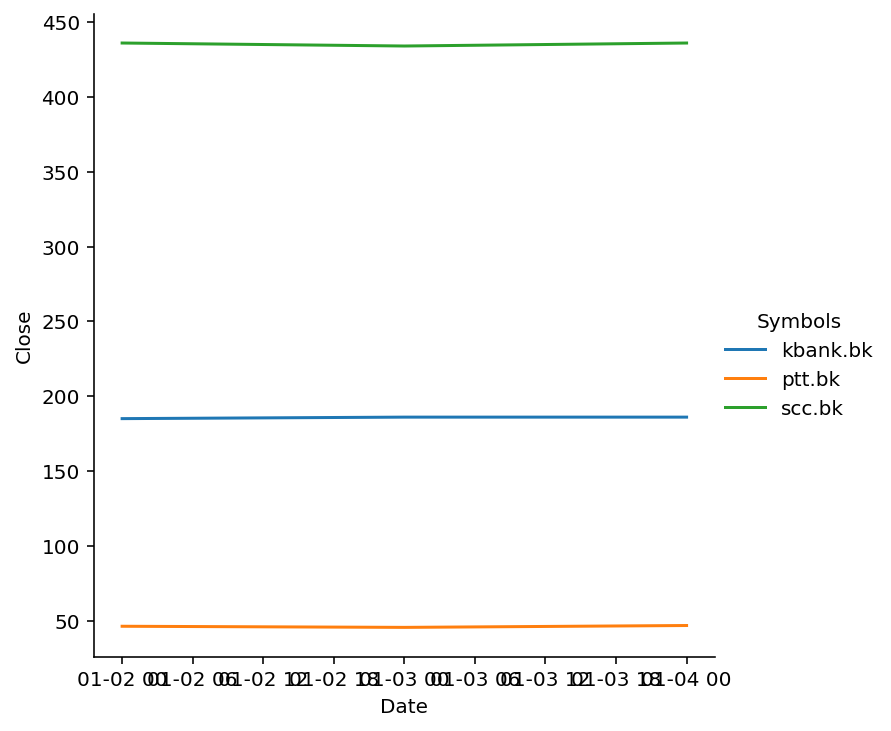

In [ ]:
sns.relplot(data=dx, x='Date', y='Close', hue='Symbols', kind='line');

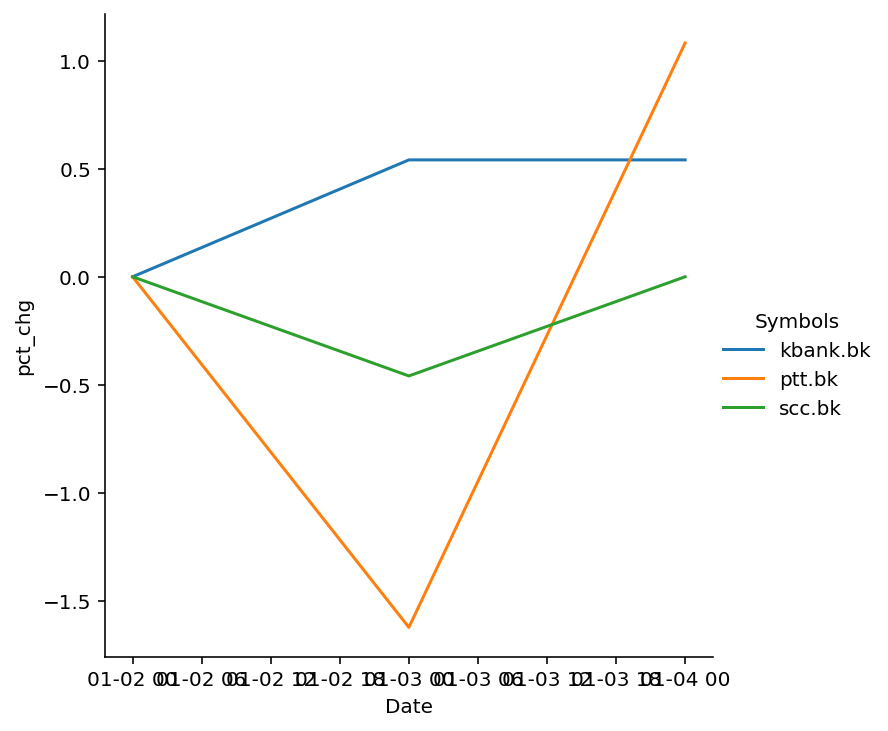

In [ ]:
sns.relplot(data=dx, x='Date', y='pct_chg', hue='Symbols', kind='line');

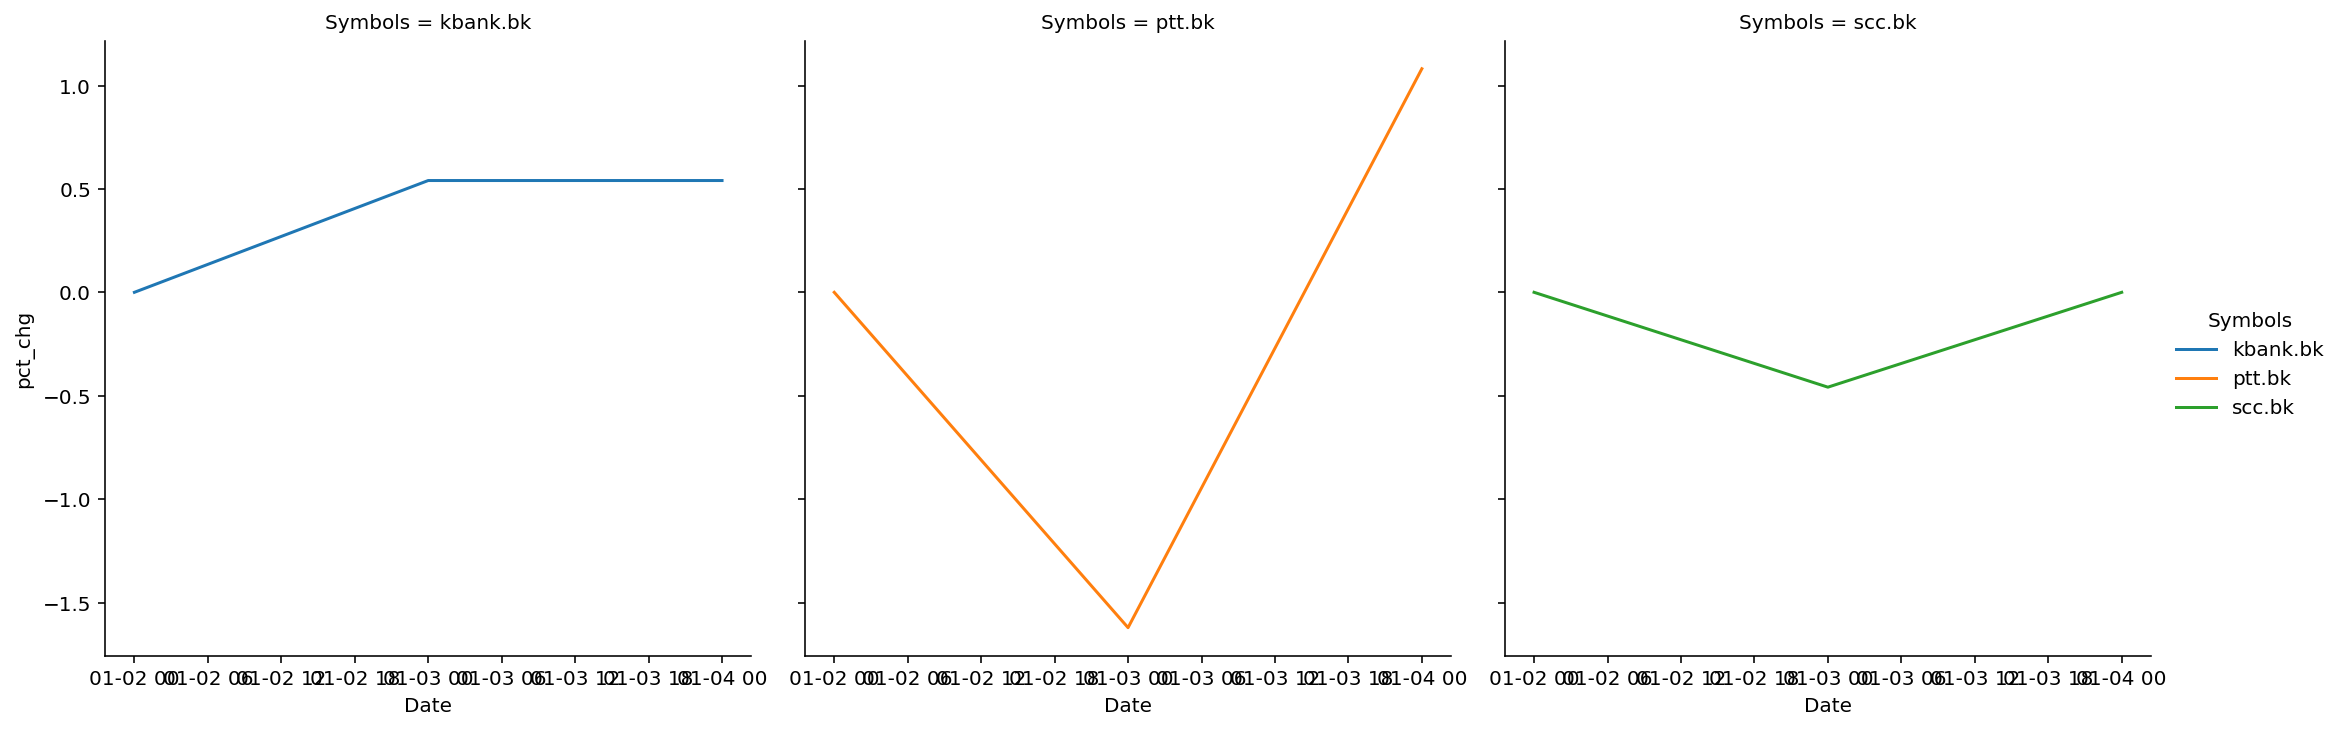

In [ ]:
sns.relplot(data=dx, x='Date', y='pct_chg', hue='Symbols', col='Symbols', kind='line', col_wrap=3);

In [ ]:
df = data.DataReader(stocks, data_source='yahoo', start='2019-01-02', end='2019-01-05')
df.head()

Attributes   Adj Close                           Close                   High  \
Symbols       kbank.bk     ptt.bk      scc.bk kbank.bk ptt.bk scc.bk kbank.bk   
Date                                                                            
2019-01-02  169.074585  39.879620  388.631653    185.0  46.25  436.0    186.0   
2019-01-03  169.988480  39.232925  386.848938    186.0  45.50  434.0    187.0   
2019-01-04  169.988480  40.310757  388.631653    186.0  46.75  436.0    186.0   

Attributes                    Low                   Open                \
Symbols    ptt.bk scc.bk kbank.bk ptt.bk scc.bk kbank.bk ptt.bk scc.bk   
Date                                                                     
2019-01-02  46.75  440.0    184.0  46.25  436.0    185.0  46.25  436.0   
2019-01-03  47.00  440.0    185.0  45.25  434.0    186.5  46.50  438.0   
2019-01-04  47.00  436.0    183.5  45.25  428.0    185.5  45.50  434.0   

Attributes   Volume                     
Symbols    kbank.bk    ptt.bk   scc.bk  
Date                                    
2019-01-02  4410900  30481900  1252800  
2019-01-03  4601300  53438400  1260300  
2019-01-04  8782100  60708300  2685400

In [ ]:
ds = df.stack()[['Close']]
ds

Attributes            Close
Date       Symbols         
2019-01-02 kbank.bk  185.00
           ptt.bk     46.25
           scc.bk    436.00
2019-01-03 kbank.bk  186.00
           ptt.bk     45.50
           scc.bk    434.00
2019-01-04 kbank.bk  186.00
           ptt.bk     46.75
           scc.bk    436.00

In [ ]:
ds = df.stack()[['Close']].sort_values(['Symbols', 'Date']).reset_index()
ds

Attributes,Date,Symbols,Close
0,2019-01-02,kbank.bk,185.00
1,2019-01-03,kbank.bk,186.00
2,2019-01-04,kbank.bk,186.00
3,2019-01-02,ptt.bk,46.25
4,2019-01-03,ptt.bk,45.50
5,2019-01-04,ptt.bk,46.75
6,2019-01-02,scc.bk,436.00
7,2019-01-03,scc.bk,434.00
8,2019-01-04,scc.bk,436.00


In [ ]:
ds.groupby('Symbols')['Close'].first()

Symbols
kbank.bk    185.00
ptt.bk       46.25
scc.bk      436.00
Name: Close, dtype: float64

In [ ]:
ds['diff from first'] = ds.groupby('Symbols')['Close'].apply(lambda x: (x - x.iloc[0]))
ds['%chg from first'] = ds.groupby('Symbols')['Close'].apply(lambda x: (x / x.iloc[0]) - 1)
ds

Attributes,Date,Symbols,Close,diff from first,%chg from first
0,2019-01-02,kbank.bk,185.00,0.00,0.000000
1,2019-01-03,kbank.bk,186.00,1.00,0.005405
2,2019-01-04,kbank.bk,186.00,1.00,0.005405
3,2019-01-02,ptt.bk,46.25,0.00,0.000000
4,2019-01-03,ptt.bk,45.50,-0.75,-0.016216
5,2019-01-04,ptt.bk,46.75,0.50,0.010811
6,2019-01-02,scc.bk,436.00,0.00,0.000000
7,2019-01-03,scc.bk,434.00,-2.00,-0.004587
8,2019-01-04,scc.bk,436.00,0.00,0.000000


In [ ]:
ds.set_index(['Symbols', 'Date'])

Attributes            Close  diff from first  %chg from first
Symbols  Date                                                
kbank.bk 2019-01-02  185.00             0.00         0.000000
         2019-01-03  186.00             1.00         0.005405
         2019-01-04  186.00             1.00         0.005405
ptt.bk   2019-01-02   46.25             0.00         0.000000
         2019-01-03   45.50            -0.75        -0.016216
         2019-01-04   46.75             0.50         0.010811
scc.bk   2019-01-02  436.00             0.00         0.000000
         2019-01-03  434.00            -2.00        -0.004587
         2019-01-04  436.00             0.00         0.000000

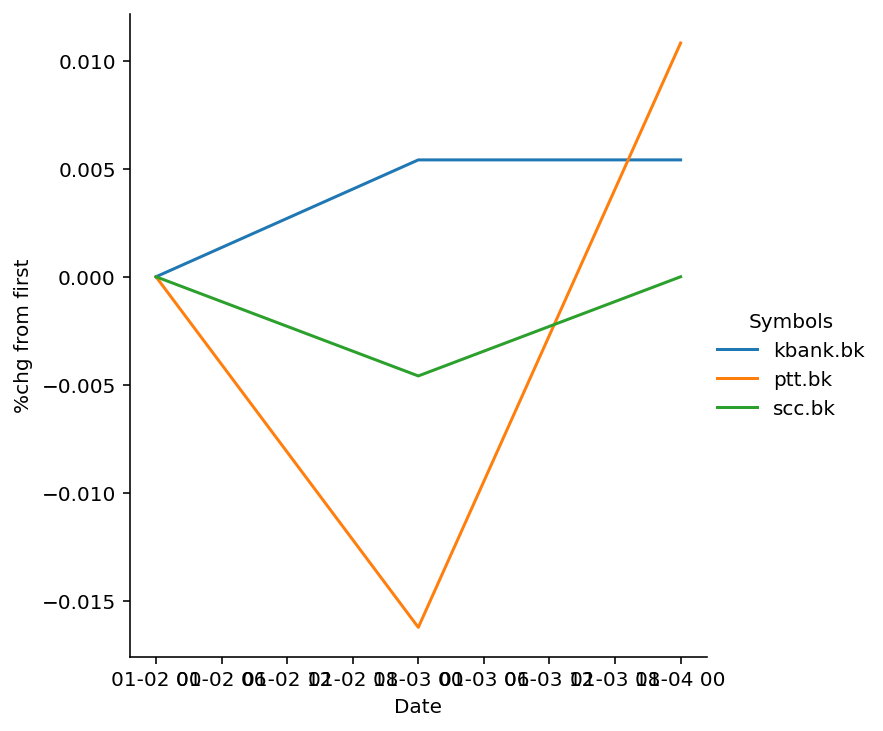

In [ ]:
sns.relplot(data=ds, x='Date', y='%chg from first', hue='Symbols', kind='line');

# Explode multivalue column (unnest list into rows) 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/IMDB_Movie_1000_Data.csv', nrows=5, usecols=['Title', 'Genre', 'Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [ ]:
df['Genre'][4]

'Action,Adventure,Fantasy'

In [ ]:
df['Genre'][4].split(',')

['Action', 'Adventure', 'Fantasy']

In [ ]:
df['Genre'].str.split(',')

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [ ]:
df['glist'] = df['Genre'].str.split(',')
df

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,"[Action, Adventure, Fantasy]"


In [ ]:
df['glist'][2][1]

'Thriller'

In [ ]:
dt =  df.explode('glist')
dt

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Sci-Fi
2,Split,"Horror,Thriller",2016,Horror
2,Split,"Horror,Thriller",2016,Thriller
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy


In [ ]:
dt['glist'].value_counts()

Adventure    3
Sci-Fi       2
Action       2
Comedy       1
Thriller     1
Animation    1
Mystery      1
Horror       1
Family       1
Fantasy      1
Name: glist, dtype: int64

In [ ]:
pd.crosstab(dt['glist'], dt['Year'], margins=all)

Year,2012,2014,2016,All
glist,,,,
Action,0,1,1,2
Adventure,1,1,1,3
Animation,0,0,1,1
Comedy,0,0,1,1
Family,0,0,1,1
Fantasy,0,0,1,1
Horror,0,0,1,1
Mystery,1,0,0,1
Sci-Fi,1,1,0,2


## Create a new data table with primary key

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/IMDB_Movie_1000_Data.csv', nrows=5, usecols=['Title', 'Genre', 'Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [ ]:
df['movie_id'] = df.index
df

,Title,Genre,Year,movie_id
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1
2,Split,"Horror,Thriller",2016,2
3,Sing,"Animation,Comedy,Family",2016,3
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4


In [ ]:
df['glist'] = df['Genre'].str.split(',')
df

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,2,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,3,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4,"[Action, Adventure, Fantasy]"


In [ ]:
dt = df.explode('glist')
dt

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Sci-Fi
2,Split,"Horror,Thriller",2016,2,Horror
2,Split,"Horror,Thriller",2016,2,Thriller
3,Sing,"Animation,Comedy,Family",2016,3,Animation
3,Sing,"Animation,Comedy,Family",2016,3,Comedy


In [ ]:
dg = dt[['movie_id', 'glist']]
dg

,movie_id,glist
0,0,Action
0,0,Adventure
0,0,Sci-Fi
1,1,Adventure
1,1,Mystery
1,1,Sci-Fi
2,2,Horror
2,2,Thriller
3,3,Animation
3,3,Comedy
